## Install Package & Import Files

In [ ]:
# import io
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import rcParams

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

from sklearn.preprocessing import OneHotEncoder # Encoding with categorical data
from sklearn.preprocessing import LabelEncoder

In [ ]:
df = pd.read_csv('./Datasets/Loan_Default.csv')

## Understand the Data

In [ ]:
df.head()

,ID,year,loan_limit,Gender,approv_in_adv,loan_type,loan_purpose,Credit_Worthiness,open_credit,business_or_commercial,...,credit_type,Credit_Score,co-applicant_credit_type,age,submission_of_application,LTV,Region,Security_Type,Status,dtir1
0,24890,2019,cf,Sex Not Available,nopre,type1,p1,l1,nopc,nob/c,...,EXP,758,CIB,25-34,to_inst,98.728814,south,direct,1,45.0
1,24891,2019,cf,Male,nopre,type2,p1,l1,nopc,b/c,...,EQUI,552,EXP,55-64,to_inst,NaN,North,direct,1,NaN
2,24892,2019,cf,Male,pre,type1,p1,l1,nopc,nob/c,...,EXP,834,CIB,35-44,to_inst,80.019685,south,direct,0,46.0
3,24893,2019,cf,Male,nopre,type1,p4,l1,nopc,nob/c,...,EXP,587,CIB,45-54,not_inst,69.376900,North,direct,0,42.0
4,24894,2019,cf,Joint,pre,type1,p1,l1,nopc,nob/c,...,CRIF,602,EXP,25-34,not_inst,91.886544,North,direct,0,39.0


In [ ]:
df.tail()

,ID,year,loan_limit,Gender,approv_in_adv,loan_type,loan_purpose,Credit_Worthiness,open_credit,business_or_commercial,...,credit_type,Credit_Score,co-applicant_credit_type,age,submission_of_application,LTV,Region,Security_Type,Status,dtir1
148665,173555,2019,cf,Sex Not Available,nopre,type1,p3,l1,nopc,nob/c,...,CIB,659,EXP,55-64,to_inst,71.792763,south,direct,0,48.0
148666,173556,2019,cf,Male,nopre,type1,p1,l1,nopc,nob/c,...,CIB,569,CIB,25-34,not_inst,74.428934,south,direct,0,15.0
148667,173557,2019,cf,Male,nopre,type1,p4,l1,nopc,nob/c,...,CIB,702,EXP,45-54,not_inst,61.332418,North,direct,0,49.0
148668,173558,2019,cf,Female,nopre,type1,p4,l1,nopc,nob/c,...,EXP,737,EXP,55-64,to_inst,70.683453,North,direct,0,29.0
148669,173559,2019,cf,Female,nopre,type1,p3,l1,nopc,nob/c,...,CIB,830,CIB,45-54,not_inst,72.849462,North,direct,0,44.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148670 entries, 0 to 148669
Data columns (total 34 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   ID                         148670 non-null  int64  
 1   year                       148670 non-null  int64  
 2   loan_limit                 145326 non-null  object 
 3   Gender                     148670 non-null  object 
 4   approv_in_adv              147762 non-null  object 
 5   loan_type                  148670 non-null  object 
 6   loan_purpose               148536 non-null  object 
 7   Credit_Worthiness          148670 non-null  object 
 8   open_credit                148670 non-null  object 
 9   business_or_commercial     148670 non-null  object 
 10  loan_amount                148670 non-null  int64  
 11  rate_of_interest           112231 non-null  float64
 12  Interest_rate_spread       112031 non-null  float64
 13  Upfront_charges            10

In [ ]:
df.shape

(148670, 34)

In [ ]:
df.columns

Index(['ID', 'year', 'loan_limit', 'Gender', 'approv_in_adv', 'loan_type',
       'loan_purpose', 'Credit_Worthiness', 'open_credit',
       'business_or_commercial', 'loan_amount', 'rate_of_interest',
       'Interest_rate_spread', 'Upfront_charges', 'term', 'Neg_ammortization',
       'interest_only', 'lump_sum_payment', 'property_value',
       'construction_type', 'occupancy_type', 'Secured_by', 'total_units',
       'income', 'credit_type', 'Credit_Score', 'co-applicant_credit_type',
       'age', 'submission_of_application', 'LTV', 'Region', 'Security_Type',
       'Status', 'dtir1'],
      dtype='object')

In [ ]:
df['ID'].nunique()

148670

In [ ]:
df['year'].nunique()

1

In [ ]:
df['loan_limit'].nunique()

2

In [ ]:
df["loan_limit"].unique()

array(['cf', nan, 'ncf'], dtype=object)

In [ ]:
df['Gender'].nunique()

4

In [ ]:
df['Gender'].unique()

array(['Sex Not Available', 'Male', 'Joint', 'Female'], dtype=object)

In [ ]:
df['approv_in_adv'].nunique()

2

In [ ]:
df['approv_in_adv'].unique()

array(['nopre', 'pre', nan], dtype=object)

In [ ]:
df['loan_type'].nunique()

3

In [ ]:
df['loan_type'].unique()

array(['type1', 'type2', 'type3'], dtype=object)

In [ ]:
df['loan_purpose'].nunique()

4

In [ ]:
df['loan_purpose'].unique()

array(['p1', 'p4', 'p3', 'p2', nan], dtype=object)

In [ ]:
df['Credit_Worthiness'].nunique()

2

In [ ]:
df['Credit_Worthiness'].unique()

array(['l1', 'l2'], dtype=object)

In [ ]:
df['open_credit'].nunique()

2

In [ ]:
df['open_credit'].unique()

array(['nopc', 'opc'], dtype=object)

In [ ]:
df['business_or_commercial'].nunique()

2

In [ ]:
df['business_or_commercial'].unique()

array(['nob/c', 'b/c'], dtype=object)

In [ ]:
df['loan_amount'].nunique()

211

In [ ]:
df['rate_of_interest'].nunique()

131

In [ ]:
df['Interest_rate_spread'].nunique()

22516

In [ ]:
df['Upfront_charges'].nunique()

58271

In [ ]:
df['term'].nunique()

26

In [ ]:
df['Neg_ammortization'].nunique()

2

In [ ]:
df['Neg_ammortization'].unique()

array(['not_neg', 'neg_amm', nan], dtype=object)

In [ ]:
df['interest_only'].nunique()

2

In [ ]:
df['interest_only'].unique()

array(['not_int', 'int_only'], dtype=object)

In [ ]:
df['lump_sum_payment'].nunique()

2

In [ ]:
df['lump_sum_payment'].unique()

array(['not_lpsm', 'lpsm'], dtype=object)

In [ ]:
df['property_value'].nunique()

385

In [ ]:
df['construction_type'].nunique()

2

In [ ]:
df['construction_type'].unique()

array(['sb', 'mh'], dtype=object)

In [ ]:
df['occupancy_type'].nunique()

3

In [ ]:
df['occupancy_type'].unique()

array(['pr', 'sr', 'ir'], dtype=object)

In [ ]:
df['Secured_by'].nunique()

2

In [ ]:
df['Secured_by'].unique()

array(['home', 'land'], dtype=object)

In [ ]:
df['total_units'].nunique()

4

In [ ]:
df['total_units'].unique()

array(['1U', '2U', '3U', '4U'], dtype=object)

In [ ]:
df['income'].nunique()

1001

In [ ]:
df['credit_type'].nunique()

4

In [ ]:
df['credit_type'].unique()

array(['EXP', 'EQUI', 'CRIF', 'CIB'], dtype=object)

In [ ]:
df['Credit_Score'].nunique()

401

In [ ]:
df['co-applicant_credit_type'].nunique()

2

In [ ]:
df['co-applicant_credit_type'].unique()

array(['CIB', 'EXP'], dtype=object)

In [ ]:
df['age'].nunique()

7

In [ ]:
df['age'].unique()

array(['25-34', '55-64', '35-44', '45-54', '65-74', '>74', '<25', nan],
      dtype=object)

In [ ]:
df['submission_of_application'].nunique()

2

In [ ]:
df['submission_of_application'].unique()

array(['to_inst', 'not_inst', nan], dtype=object)

In [ ]:
df['LTV'].nunique()

8484

In [ ]:
df['Region'].nunique()

4

In [ ]:
df['Region'].unique()

array(['south', 'North', 'central', 'North-East'], dtype=object)

In [ ]:
df['Security_Type'].nunique()

2

In [ ]:
df['Security_Type'].unique()

array(['direct', 'Indriect'], dtype=object)

In [ ]:
df['Status'].nunique()

2

In [ ]:
df['Status'].unique()

array([1, 0], dtype=int64)

In [ ]:
df['dtir1'].nunique()

57

## Data Cleaning

### Drop year (all entries are 2019) & id

In [ ]:
df.drop(columns=['year'], inplace=True)
df.drop(columns=['ID'], inplace=True)

### Transform column name into lowercase

In [ ]:
df.columns = df.columns.str.lower()

df.columns

Index(['loan_limit', 'gender', 'approv_in_adv', 'loan_type', 'loan_purpose',
       'credit_worthiness', 'open_credit', 'business_or_commercial',
       'loan_amount', 'rate_of_interest', 'interest_rate_spread',
       'upfront_charges', 'term', 'neg_ammortization', 'interest_only',
       'lump_sum_payment', 'property_value', 'construction_type',
       'occupancy_type', 'secured_by', 'total_units', 'income', 'credit_type',
       'credit_score', 'co-applicant_credit_type', 'age',
       'submission_of_application', 'ltv', 'region', 'security_type', 'status',
       'dtir1'],
      dtype='object')

### Check for duplicates

In [ ]:
df.duplicated().sum()

0

### Check for missing values

In [ ]:
df.isna().sum()

loan_limit                    3344
gender                           0
approv_in_adv                  908
loan_type                        0
loan_purpose                   134
credit_worthiness                0
open_credit                      0
business_or_commercial           0
loan_amount                      0
rate_of_interest             36439
interest_rate_spread         36639
upfront_charges              39642
term                            41
neg_ammortization              121
interest_only                    0
lump_sum_payment                 0
property_value               15098
construction_type                0
occupancy_type                   0
secured_by                       0
total_units                      0
income                        9150
credit_type                      0
credit_score                     0
co-applicant_credit_type         0
age                            200
submission_of_application      200
ltv                          15098
region              

Fill 'interest_rate_spread' 'upfront_charges' 'ltv' with their mean

In [ ]:
df['interest_rate_spread'].replace('NA', np.nan, inplace=True)
df['upfront_charges'].replace('-', np.nan, inplace=True)
df['ltv'].replace('9999', np.nan, inplace=True)

df['interest_rate_spread'].fillna(df['interest_rate_spread'].mean(), inplace=True)
df['upfront_charges'].fillna(df['upfront_charges'].mean(), inplace=True)
df['ltv'].fillna(df['ltv'].mean(), inplace=True)


In [ ]:
df.isna().sum()

loan_limit                    3344
gender                           0
approv_in_adv                  908
loan_type                        0
loan_purpose                   134
credit_worthiness                0
open_credit                      0
business_or_commercial           0
loan_amount                      0
rate_of_interest             36439
interest_rate_spread             0
upfront_charges                  0
term                            41
neg_ammortization              121
interest_only                    0
lump_sum_payment                 0
property_value               15098
construction_type                0
occupancy_type                   0
secured_by                       0
total_units                      0
income                        9150
credit_type                      0
credit_score                     0
co-applicant_credit_type         0
age                            200
submission_of_application      200
ltv                              0
region              

Use SimpleImputer for 'rate_of_interest', 'term', 'property_value', 'income', 'dtir1' - uses mean value to impute

In [ ]:
imputer = SimpleImputer()
df[['rate_of_interest','term','property_value','income','dtir1']] = imputer.fit_transform(df[['rate_of_interest','term','property_value','income','dtir1']])

Use SimpleImputer for 'age','loan_limit','approv_in_adv','loan_purpose','neg_ammortization','submission_of_application' - uses their most frequent value to impute

In [ ]:
imputer = SimpleImputer(strategy='most_frequent')
df[['age','loan_limit','approv_in_adv','loan_purpose','neg_ammortization','submission_of_application']] = imputer.fit_transform(df[['age','loan_limit','approv_in_adv','loan_purpose','neg_ammortization','submission_of_application']])

In [ ]:
df.isna().sum()

loan_limit                   0
gender                       0
approv_in_adv                0
loan_type                    0
loan_purpose                 0
credit_worthiness            0
open_credit                  0
business_or_commercial       0
loan_amount                  0
rate_of_interest             0
interest_rate_spread         0
upfront_charges              0
term                         0
neg_ammortization            0
interest_only                0
lump_sum_payment             0
property_value               0
construction_type            0
occupancy_type               0
secured_by                   0
total_units                  0
income                       0
credit_type                  0
credit_score                 0
co-applicant_credit_type     0
age                          0
submission_of_application    0
ltv                          0
region                       0
security_type                0
status                       0
dtir1                        0
dtype: i

## Data Visualization

**loan_limit**

maximum avaliable amount of the loan allowed to be taken

In [ ]:
df["loan_limit"].unique()

array(['cf', 'ncf'], dtype=object)

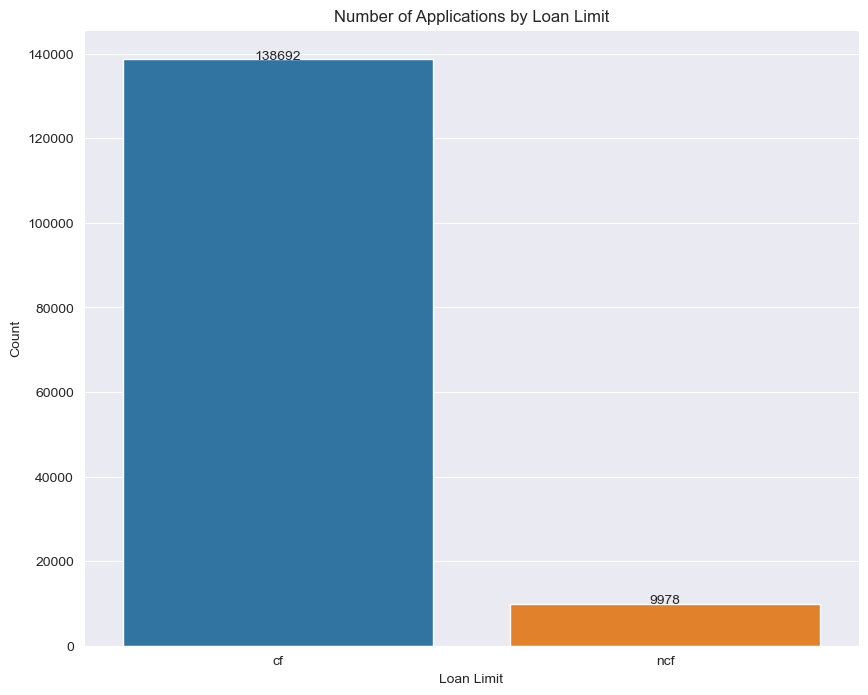

In [ ]:
# Get the counts for each category
value_counts = df['loan_limit'].value_counts()

# Set the figure size and style
plt.figure(figsize=(10,8))
sns.set_style('darkgrid')

# Plot the countplot with category labels and count labels
sns.countplot(data=df, x='loan_limit', order=value_counts.index)
plt.title('Number of Applications by Loan Limit', fontsize=12)
plt.xlabel('Loan Limit')
plt.ylabel('Count')

# Add the count labels above each bar
for i, count in enumerate(value_counts):
    plt.text(i, count+5, str(count), ha='center')

plt.show()

**gender**

sex type

In [ ]:
df["gender"].unique()

array(['Sex Not Available', 'Male', 'Joint', 'Female'], dtype=object)

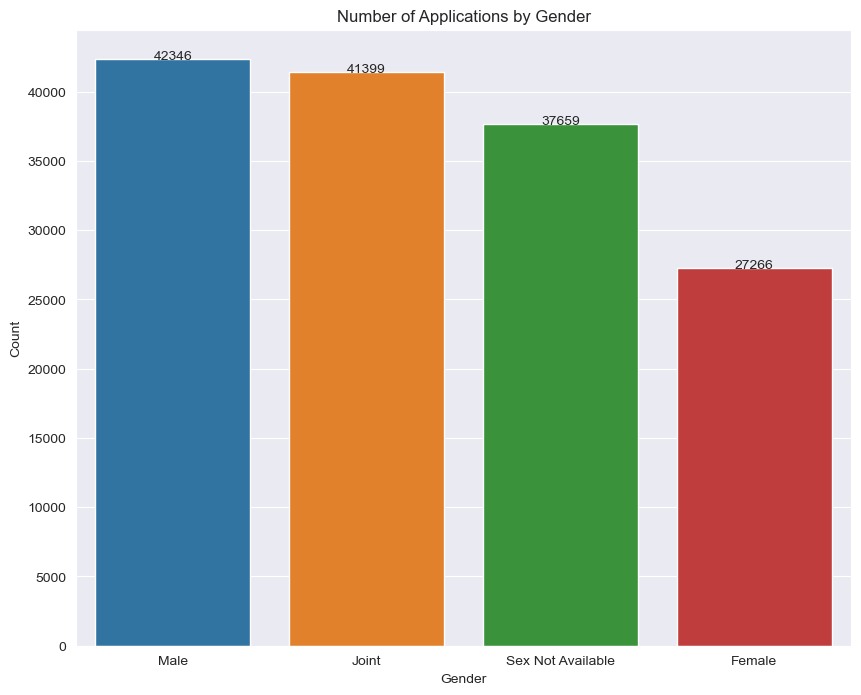

In [ ]:
# Get the counts for each category
value_counts = df['gender'].value_counts()

# Set the figure size and style
plt.figure(figsize=(10,8))
sns.set_style('darkgrid')

# Plot the countplot with category labels and count labels
sns.countplot(data=df, x='gender', order=value_counts.index)
plt.title('Number of Applications by Gender', fontsize=12)
plt.xlabel('Gender')
plt.ylabel('Count')

# Add the count labels above each bar
for i, count in enumerate(value_counts):
    plt.text(i, count+5, str(count), ha='center')

plt.show()

Male has the most number of applications

**approv_in_adv**

Is loan pre-approved or not

In [ ]:
df["approv_in_adv"].unique()

array(['nopre', 'pre'], dtype=object)

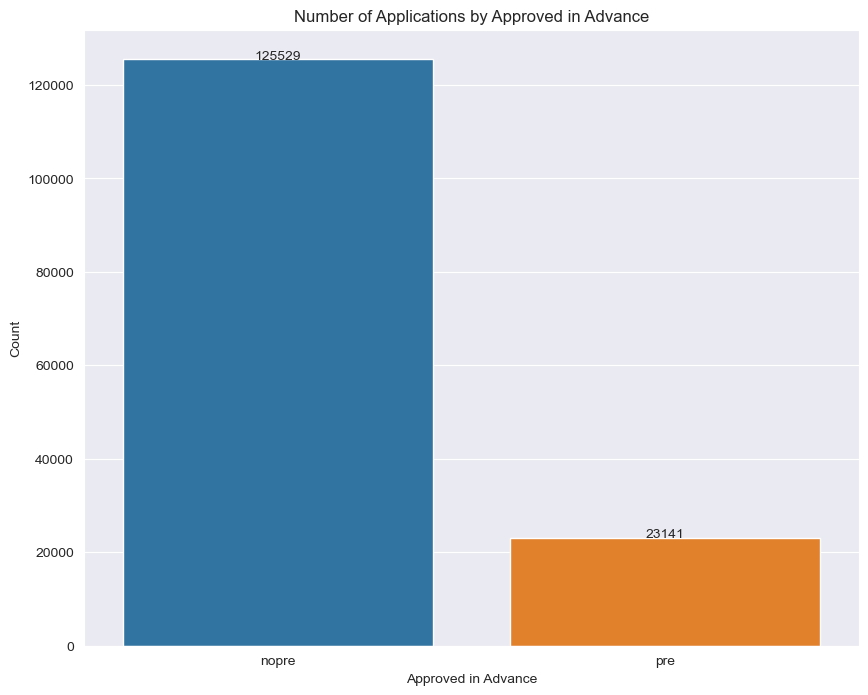

In [ ]:
# Get the counts for each category
value_counts = df['approv_in_adv'].value_counts()

# Set the figure size and style
plt.figure(figsize=(10,8))
sns.set_style('darkgrid')

# Plot the countplot with category labels and count labels
sns.countplot(data=df, x='approv_in_adv', order=value_counts.index)
plt.title('Number of Applications by Approved in Advance', fontsize=12)
plt.xlabel('Approved in Advance')
plt.ylabel('Count')

# Add the count labels above each bar
for i, count in enumerate(value_counts):
    plt.text(i, count+5, str(count), ha='center')

plt.show()

Majority of the applications are not pre-approved

**loan_type**

Type of loan

In [ ]:
df["loan_type"].unique()

array(['type1', 'type2', 'type3'], dtype=object)

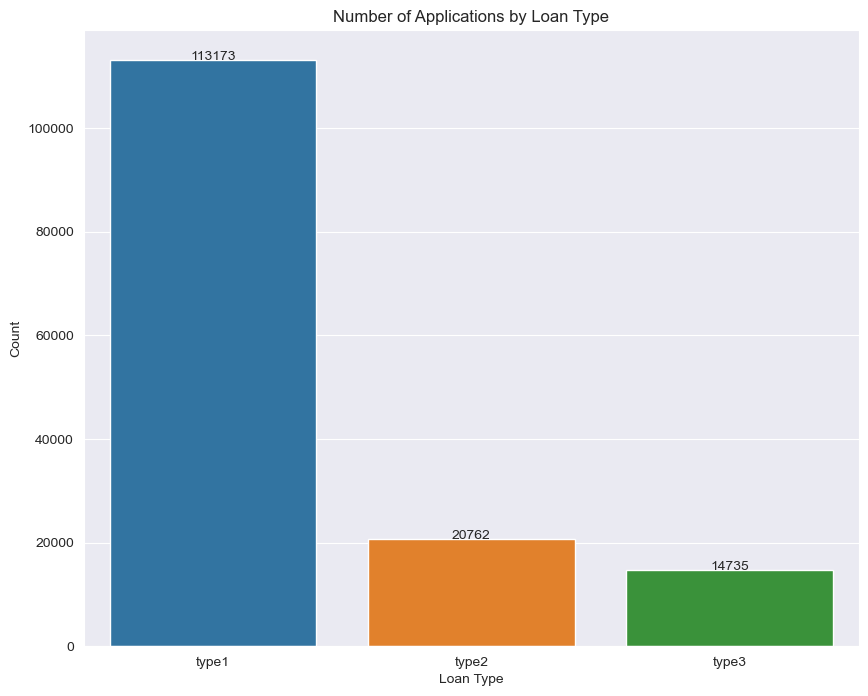

In [ ]:
# Get the counts for each category
value_counts = df['loan_type'].value_counts()

# Set the figure size and style
plt.figure(figsize=(10,8))
sns.set_style('darkgrid')

# Plot the countplot with category labels and count labels
sns.countplot(data=df, x='loan_type', order=value_counts.index)
plt.title('Number of Applications by Loan Type', fontsize=12)
plt.xlabel('Loan Type')
plt.ylabel('Count')

# Add the count labels above each bar
for i, count in enumerate(value_counts):
    plt.text(i, count+5, str(count), ha='center')

plt.show()

**loan_purpose**

the reason you want to borrow money

In [ ]:
df["loan_purpose"].unique()

array(['p1', 'p4', 'p3', 'p2'], dtype=object)

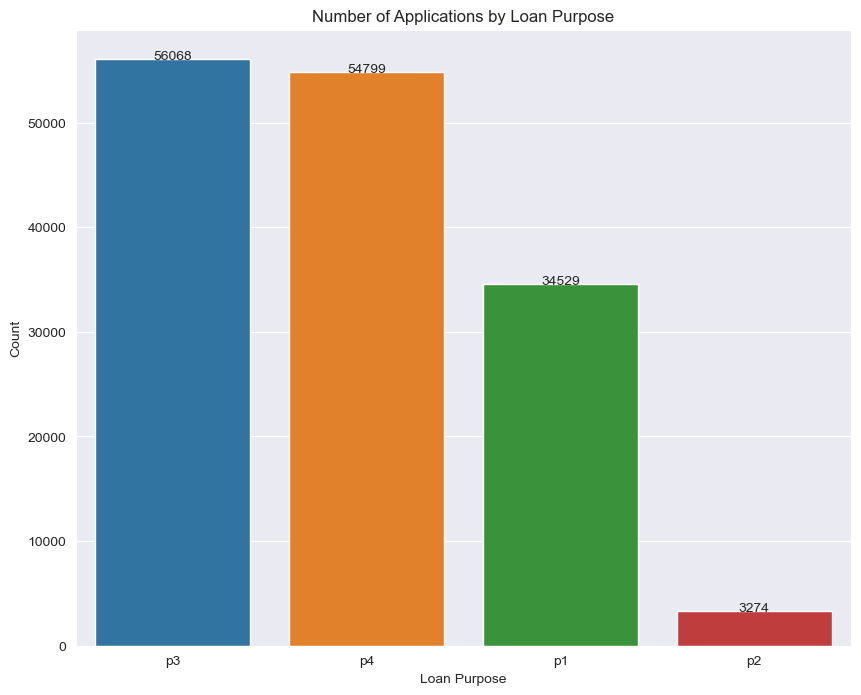

In [ ]:
# Get the counts for each category
value_counts = df['loan_purpose'].value_counts()

# Set the figure size and style
plt.figure(figsize=(10,8))
sns.set_style('darkgrid')

# Plot the countplot with category labels and count labels
sns.countplot(data=df, x='loan_purpose', order=value_counts.index)
plt.title('Number of Applications by Loan Purpose', fontsize=12)
plt.xlabel('Loan Purpose')
plt.ylabel('Count')

# Add the count labels above each bar
for i, count in enumerate(value_counts):
    plt.text(i, count+5, str(count), ha='center')

plt.show()

**credit_worthiness**

is how a lender determines that you will default on your debt obligations, or how worthy you are to receive new credit.

In [ ]:
df["credit_worthiness"].unique()

array(['l1', 'l2'], dtype=object)

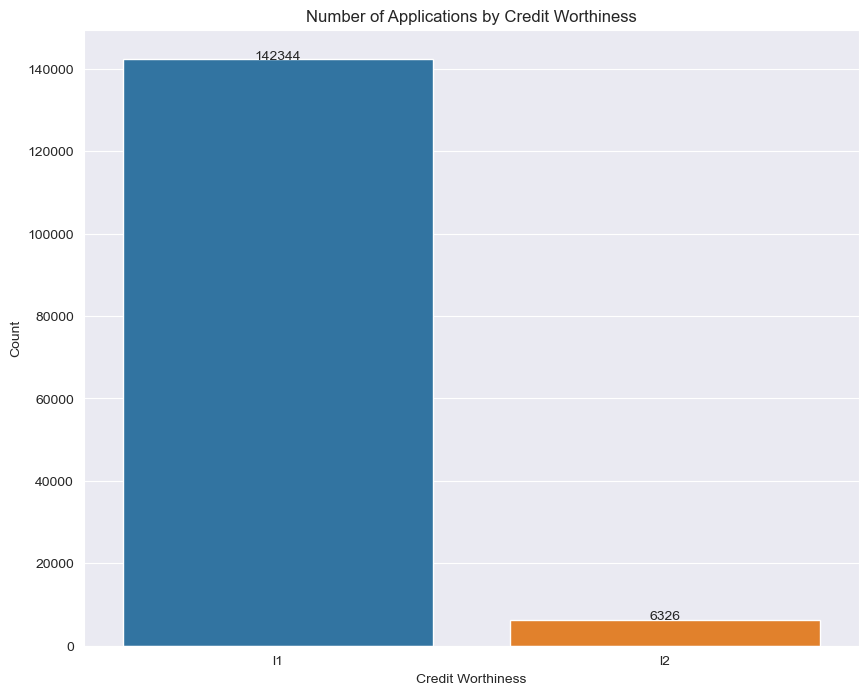

In [ ]:
# Get the counts for each category
value_counts = df['credit_worthiness'].value_counts()

# Set the figure size and style
plt.figure(figsize=(10,8))
sns.set_style('darkgrid')

# Plot the countplot with category labels and count labels
sns.countplot(data=df, x='credit_worthiness', order=value_counts.index)
plt.title('Number of Applications by Credit Worthiness', fontsize=12)
plt.xlabel('Credit Worthiness')
plt.ylabel('Count')

# Add the count labels above each bar
for i, count in enumerate(value_counts):
    plt.text(i, count+5, str(count), ha='center')

plt.show()

**open_credit**

is a pre-approved loan between a lender and a borrower. It allows the borrower to make repeated withdrawals up to a certain limit.

In [ ]:
df["open_credit"].unique()

array(['nopc', 'opc'], dtype=object)

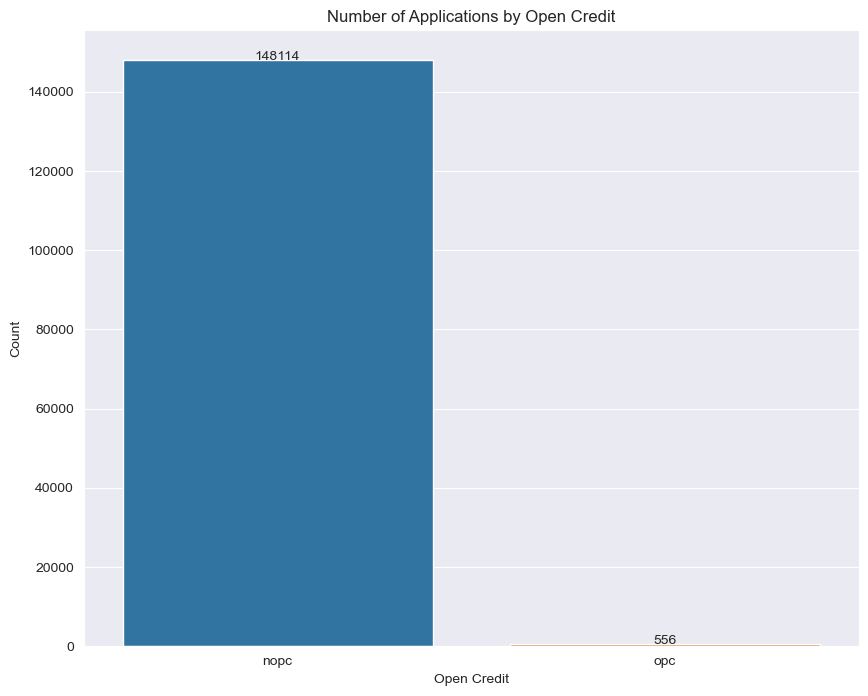

In [ ]:
# Get the counts for each category
value_counts = df['open_credit'].value_counts()

# Set the figure size and style
plt.figure(figsize=(10,8))
sns.set_style('darkgrid')

# Plot the countplot with category labels and count labels
sns.countplot(data=df, x='open_credit', order=value_counts.index)
plt.title('Number of Applications by Open Credit', fontsize=12)
plt.xlabel('Open Credit')
plt.ylabel('Count')

# Add the count labels above each bar
for i, count in enumerate(value_counts):
    plt.text(i, count+5, str(count), ha='center')

plt.show()

**business_or_commercial**

Usage type of the loan amount

In [ ]:
df["business_or_commercial"].unique()

array(['nob/c', 'b/c'], dtype=object)

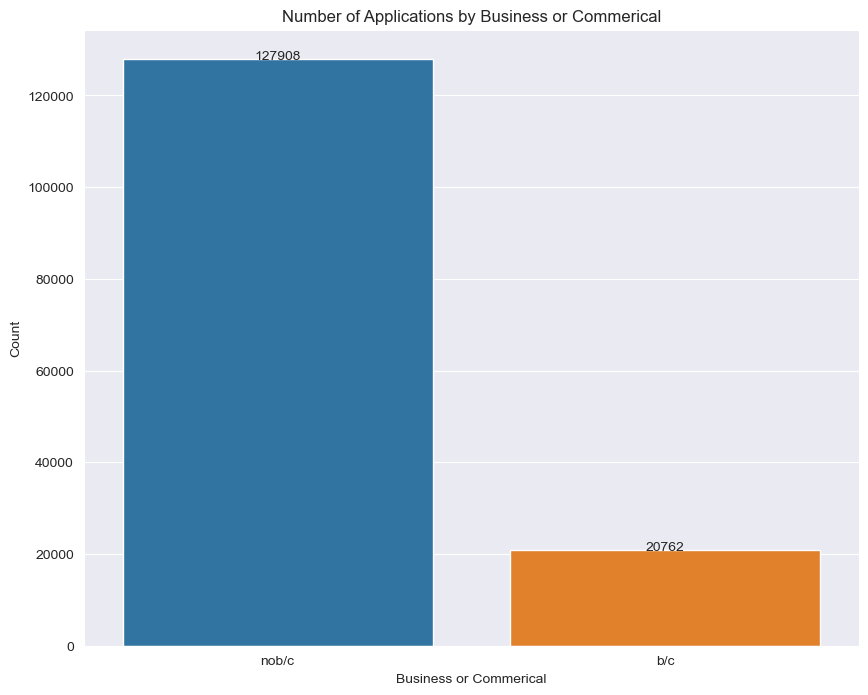

In [ ]:
# Get the counts for each category
value_counts = df['business_or_commercial'].value_counts()

# Set the figure size and style
plt.figure(figsize=(10,8))
sns.set_style('darkgrid')

# Plot the countplot with category labels and count labels
sns.countplot(data=df, x='business_or_commercial', order=value_counts.index)
plt.title('Number of Applications by Business or Commerical', fontsize=12)
plt.xlabel('Business or Commerical')
plt.ylabel('Count')

# Add the count labels above each bar
for i, count in enumerate(value_counts):
    plt.text(i, count+5, str(count), ha='center')

plt.show()

**loan_amount**

The exact loan amount

In [ ]:
df["loan_amount"].describe()

count    1.486700e+05
mean     3.311177e+05
std      1.839093e+05
min      1.650000e+04
25%      1.965000e+05
50%      2.965000e+05
75%      4.365000e+05
max      3.576500e+06
Name: loan_amount, dtype: float64

Minimum loan amount = 16500 <br>
Average loan amount = 331117.7 <br>
Maximum loan amount = 3,576,500

C:\Users\User\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Distribution of loan_amount')

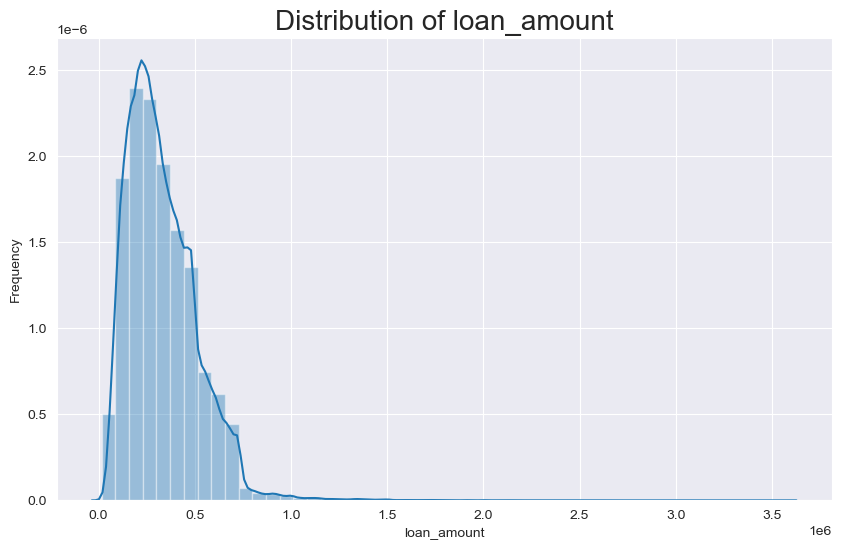

In [ ]:
plt.figure(figsize=(10,6))
g = sns.distplot(df['loan_amount'])
g.set_xlabel("loan_amount")
g.set_ylabel("Frequency")
plt.title('Distribution of loan_amount',size = 20)

Right Skewed Distribution

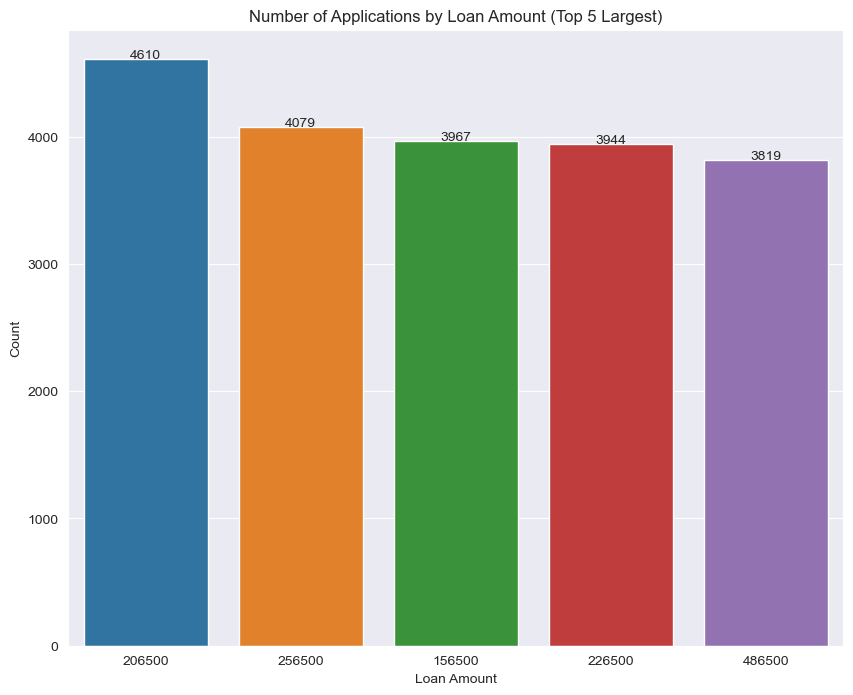

In [ ]:
# Get the counts for each category
value_counts = df['loan_amount'].value_counts().nlargest(5)

# Set the figure size and style
plt.figure(figsize=(10,8))
sns.set_style('darkgrid')

# Plot the countplot with category labels and count labels
sns.countplot(data=df, x='loan_amount', order=value_counts.index)
plt.title('Number of Applications by Loan Amount (Top 5 Largest)', fontsize=12)
plt.xlabel('Loan Amount')
plt.ylabel('Count')

# Add the count labels above each bar
for i, count in enumerate(value_counts):
    plt.text(i, count+5, str(count), ha='center')

plt.show() 

**rate_of_interest**

is the amount a lender charges a borrower and is a percentage of the principal—the amount loaned.

In [ ]:
df["rate_of_interest"].describe()

count    148670.000000
mean          4.045476
std           0.487764
min           0.000000
25%           3.750000
50%           4.045476
75%           4.250000
max           8.000000
Name: rate_of_interest, dtype: float64

Minimum rate of interest = 0.0<br>
Average rate of interest = 4.045476<br>
Maximum rate of interest = 8.0

C:\Users\User\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Distribution of rate_of_interest')

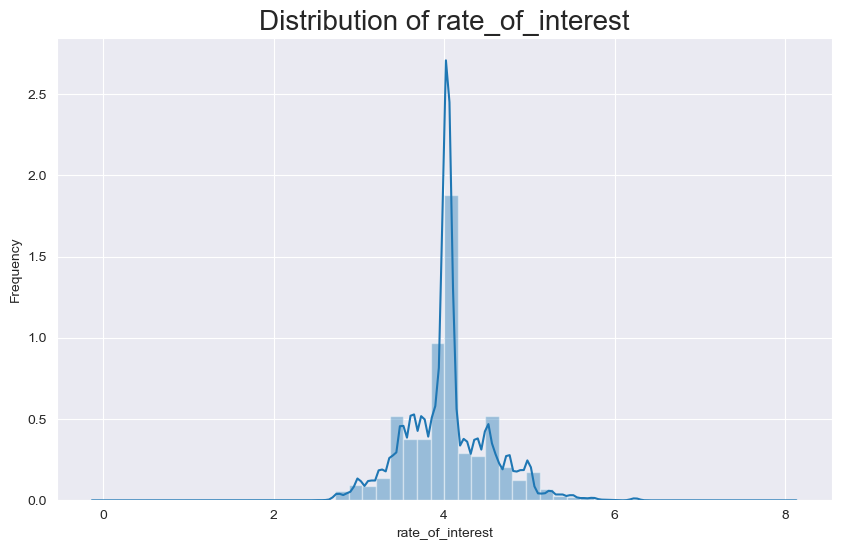

In [ ]:
plt.figure(figsize=(10,6))
g = sns.distplot(df['rate_of_interest'])
g.set_xlabel("rate_of_interest")
g.set_ylabel("Frequency")
plt.title('Distribution of rate_of_interest',size = 20)

Zero Skewed Distribution

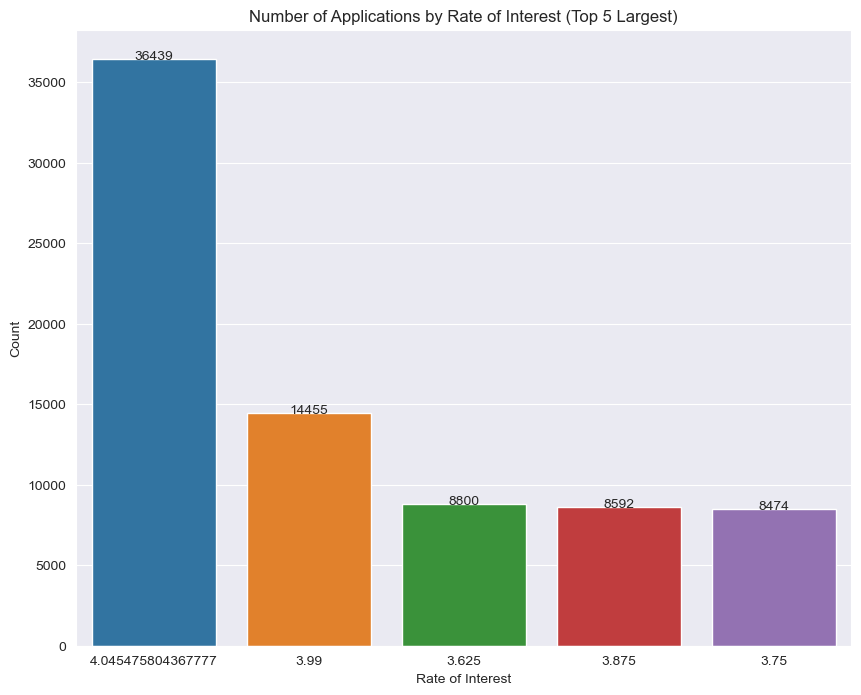

In [ ]:
# Get the counts for each category
value_counts = df['rate_of_interest'].value_counts().nlargest(5)

# Set the figure size and style
plt.figure(figsize=(10,8))
sns.set_style('darkgrid')

# Plot the countplot with category labels and count labels
sns.countplot(data=df, x='rate_of_interest', order=value_counts.index)
plt.title('Number of Applications by Rate of Interest (Top 5 Largest)', fontsize=12)
plt.xlabel('Rate of Interest')
plt.ylabel('Count')

# Add the count labels above each bar
for i, count in enumerate(value_counts):
    plt.text(i, count+5, str(count), ha='center')

plt.show()

**interest_rate_spread**

the difference between the interest rate a financial institution pays to depositors and the interest rate it receives from loans

In [ ]:
df["interest_rate_spread"].describe()

count    148670.000000
mean          0.441656
std           0.445359
min          -3.638000
25%           0.181500
50%           0.441656
75%           0.620000
max           3.357000
Name: interest_rate_spread, dtype: float64

Minimum interest rate spread = -3.638000 <br>
Average interest rate spread = 0.441656 <br>
Maximum interest rate spread = 3.357000

C:\Users\User\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Distribution of interest_rate_spread')

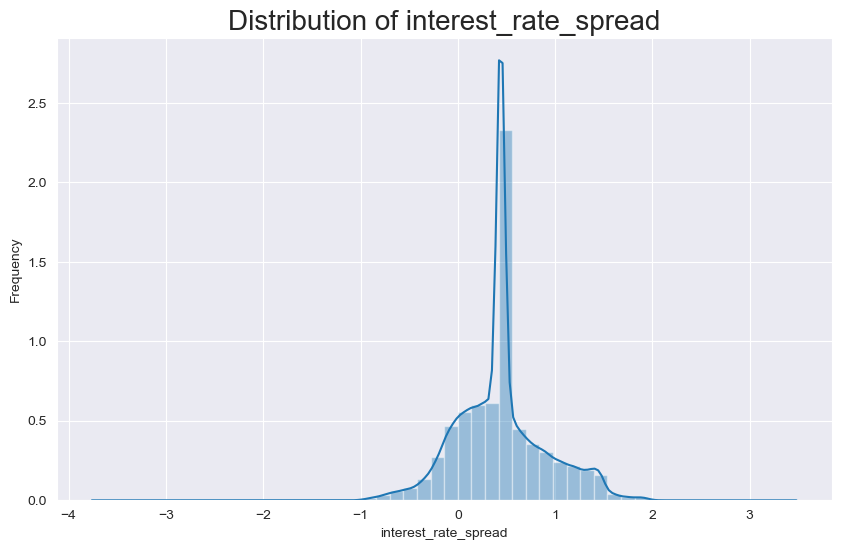

In [ ]:
plt.figure(figsize=(10,6))
g = sns.distplot(df['interest_rate_spread'])
g.set_xlabel("interest_rate_spread")
g.set_ylabel("Frequency")
plt.title('Distribution of interest_rate_spread',size = 20)

Zero Skewed Distribution? (not sure)

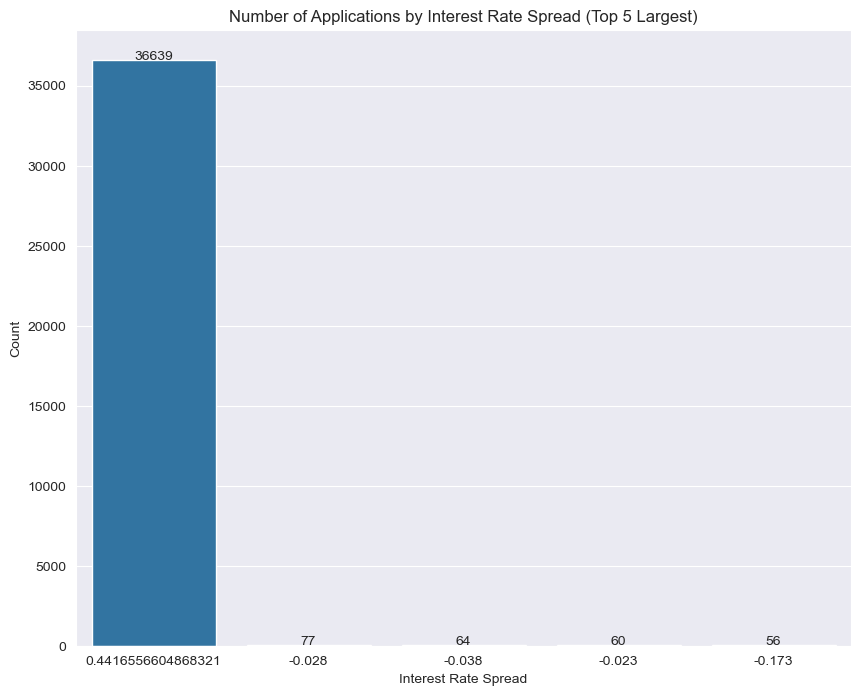

In [ ]:
# Get the counts for each category
value_counts = df['interest_rate_spread'].value_counts().nlargest(5)

# Set the figure size and style
plt.figure(figsize=(10,8))
sns.set_style('darkgrid')

# Plot the countplot with category labels and count labels
sns.countplot(data=df, x='interest_rate_spread', order=value_counts.index)
plt.title('Number of Applications by Interest Rate Spread (Top 5 Largest)', fontsize=12)
plt.xlabel('Interest Rate Spread')
plt.ylabel('Count')

# Add the count labels above each bar
for i, count in enumerate(value_counts):
    plt.text(i, count+5, str(count), ha='center')

plt.show()

**upfront_charges**

Fee paid to a lender by a borrower as consideration for making a new loan

In [ ]:
df["upfront_charges"].describe()

count    148670.000000
mean       3224.996127
std        2784.133285
min           0.000000
25%        1250.000000
50%        3224.996127
75%        3889.495000
max       60000.000000
Name: upfront_charges, dtype: float64

Minimum upfront charges = 0.000000<br>
Average upfront charges = 3224.996127<br>
Maximum upfront charges = 60000.000000

C:\Users\User\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Distribution of upfront_charges')

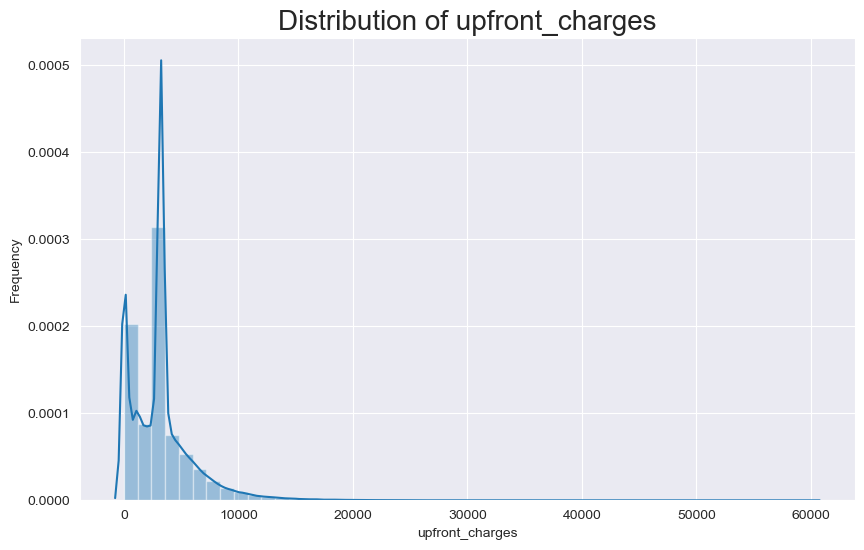

In [ ]:
plt.figure(figsize=(10,6))
g = sns.distplot(df['upfront_charges'])
g.set_xlabel("upfront_charges")
g.set_ylabel("Frequency")
plt.title('Distribution of upfront_charges',size = 20)

Right Skewed Distribution

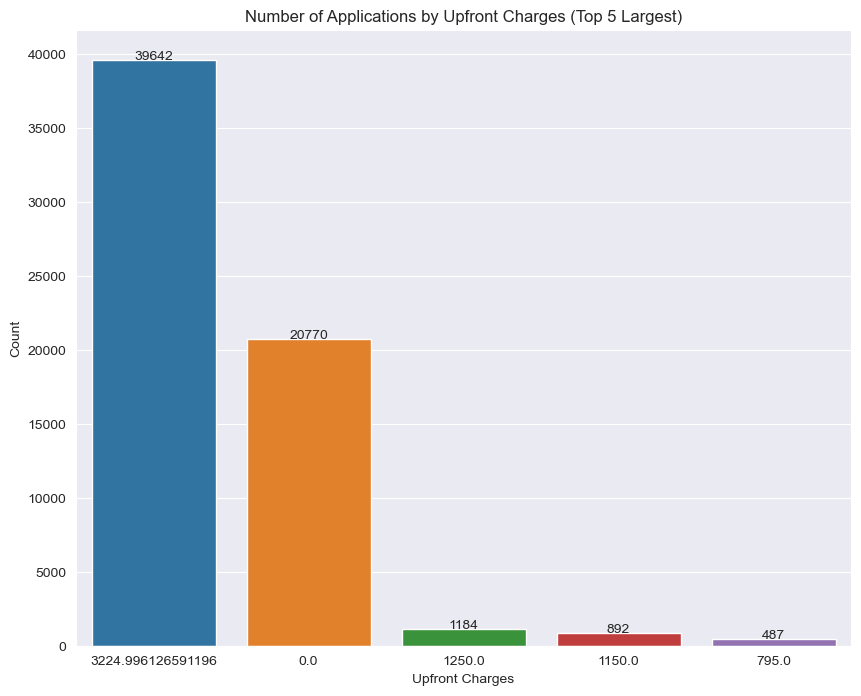

In [ ]:
# Get the counts for each category
value_counts = df['upfront_charges'].value_counts().nlargest(5)

# Set the figure size and style
plt.figure(figsize=(10,8))
sns.set_style('darkgrid')

# Plot the countplot with category labels and count labels
sns.countplot(data=df, x='upfront_charges', order=value_counts.index)
plt.title('Number of Applications by Upfront Charges (Top 5 Largest)', fontsize=12)
plt.xlabel('Upfront Charges')
plt.ylabel('Count')

# Add the count labels above each bar
for i, count in enumerate(value_counts):
    plt.text(i, count+5, str(count), ha='center')

plt.show()

**term**

the loan's repayment period

In [ ]:
df["term"].describe()

count    148670.000000
mean        335.136582
std          58.401029
min          96.000000
25%         360.000000
50%         360.000000
75%         360.000000
max         360.000000
Name: term, dtype: float64

Minimum term = 96.000000 <br>
Average term = 335.136582 <br>
Maximum term = 360.000000

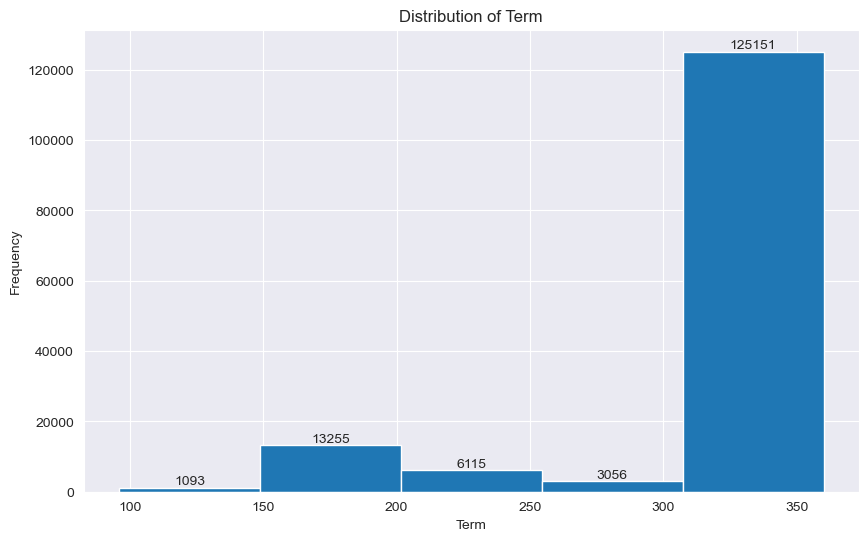

In [ ]:
plt.figure(figsize=(10,6))

# Create a histogram of the 'column_name' column
n_bins = 5
counts, bins, patches = plt.hist(df['term'], bins=n_bins)

# Set the axis labels and plot title
plt.xlabel('Term')
plt.ylabel('Frequency')
plt.title('Distribution of Term')

# Add count labels to each bar
for i in range(n_bins):
    bin_x = (bins[i] + bins[i+1])/2
    bin_y = counts[i]
    plt.text(bin_x, bin_y, str(int(bin_y)), ha='center', va='bottom')

# Show the plot
plt.show()

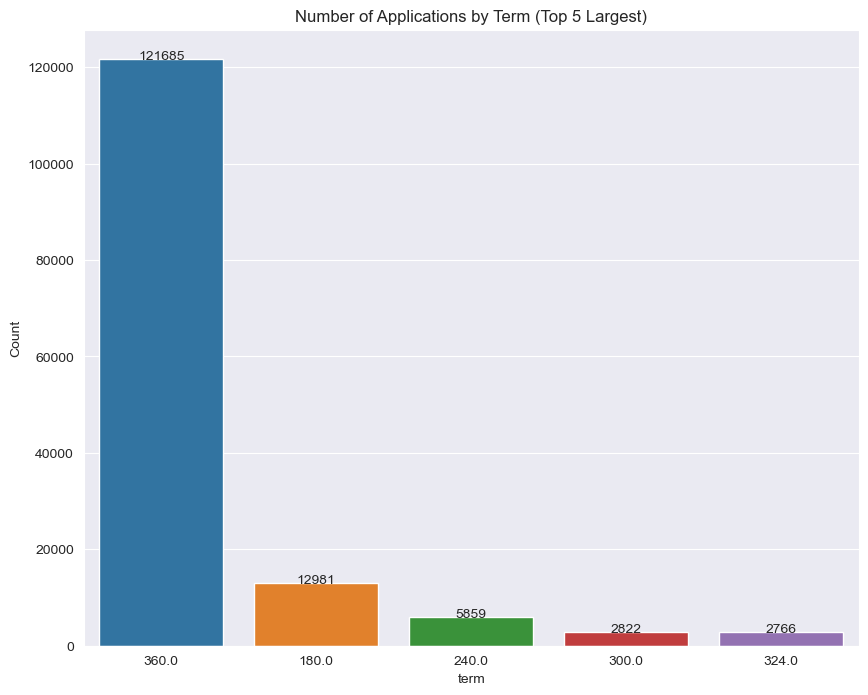

In [ ]:
# Get the counts for each category
value_counts = df['term'].value_counts().nlargest(5)

# Set the figure size and style
plt.figure(figsize=(10,8))
sns.set_style('darkgrid')

# Plot the countplot with category labels and count labels
sns.countplot(data=df, x='term', order=value_counts.index)
plt.title('Number of Applications by Term (Top 5 Largest)', fontsize=12)
plt.xlabel('term')
plt.ylabel('Count')

# Add the count labels above each bar
for i, count in enumerate(value_counts):
    plt.text(i, count+5, str(count), ha='center')

plt.show()

**neg_ammortization**

refers to a situation when a loan borrower makes a payment less than the standard installment set by the bank.

In [ ]:
df["neg_ammortization"].unique()

array(['not_neg', 'neg_amm'], dtype=object)

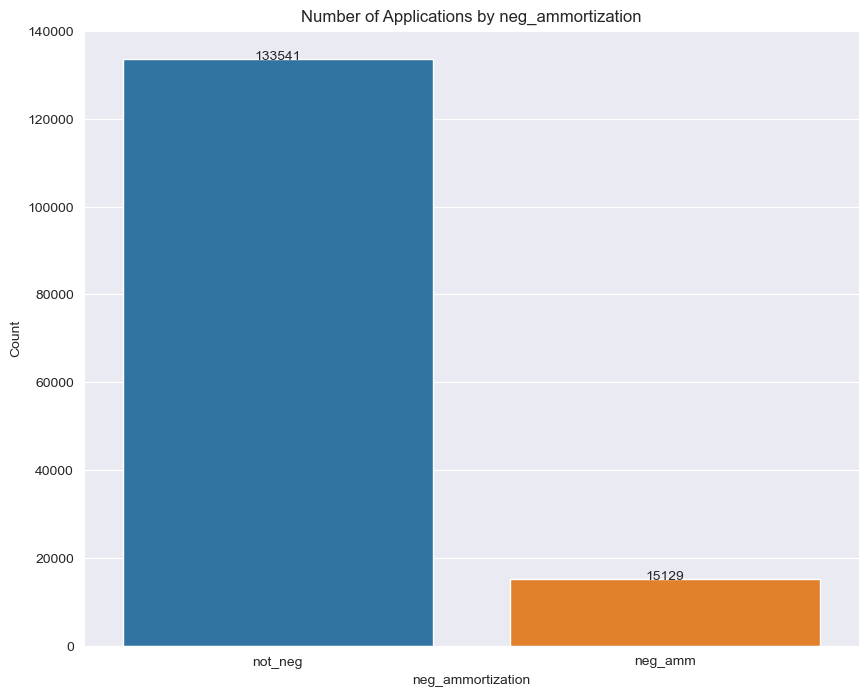

In [ ]:
# Get the counts for each category
value_counts = df["neg_ammortization"].value_counts()

# Set the figure size and style
plt.figure(figsize=(10,8))
sns.set_style('darkgrid')

# Plot the countplot with category labels and count labels
sns.countplot(data=df, x="neg_ammortization", order=value_counts.index)
plt.title('Number of Applications by neg_ammortization', fontsize=12)
plt.xlabel('neg_ammortization')
plt.ylabel('Count')

# Add the count labels above each bar
for i, count in enumerate(value_counts):
    plt.text(i, count+5, str(count), ha='center')

plt.show()

**interest_only**

amount of interest only without principles

In [ ]:
df["interest_only"].unique()

array(['not_int', 'int_only'], dtype=object)

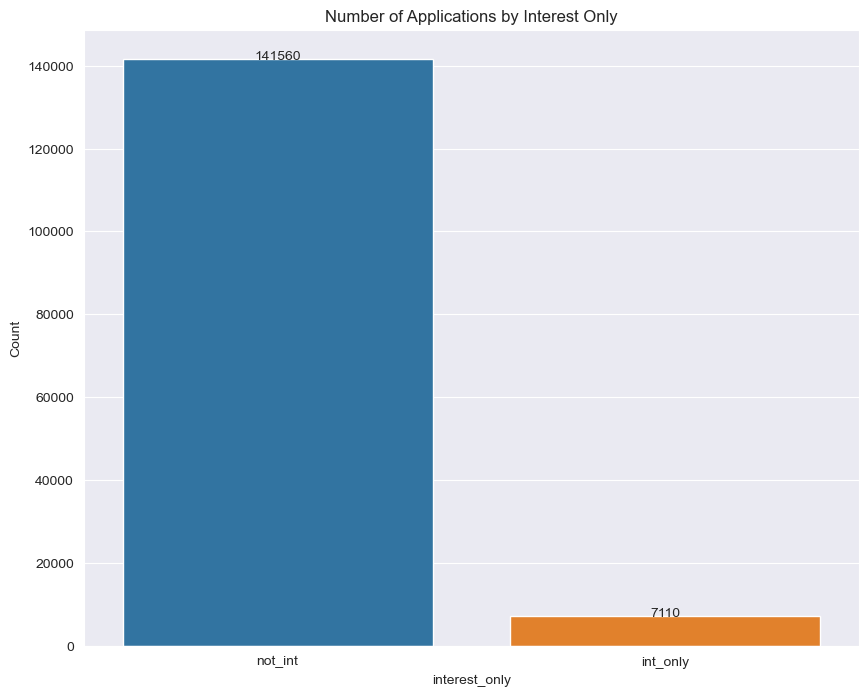

In [ ]:
# Get the counts for each category
value_counts = df["interest_only"].value_counts()

# Set the figure size and style
plt.figure(figsize=(10,8))
sns.set_style('darkgrid')

# Plot the countplot with category labels and count labels
sns.countplot(data=df, x="interest_only", order=value_counts.index)
plt.title('Number of Applications by Interest Only', fontsize=12)
plt.xlabel('interest_only')
plt.ylabel('Count')

# Add the count labels above each bar
for i, count in enumerate(value_counts):
    plt.text(i, count+5, str(count), ha='center')

plt.show()

**lump_sum_payment** 

Is an amount of money that is paid in one single payment rather than in installments

In [ ]:
#TO FIND THE NUMBER OF UNIQUE APP CATEGORIES

print( len(df['lump_sum_payment'].unique()) , "lump_sum_payment")

print("\n", df['lump_sum_payment'].unique())

2 lump_sum_payment

 ['not_lpsm' 'lpsm']


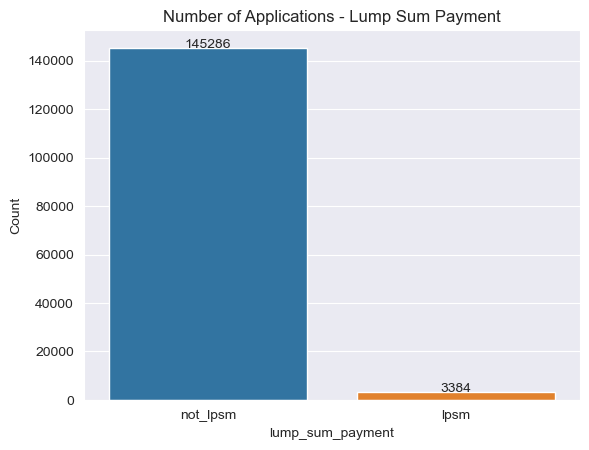

In [ ]:
# Get the counts for each category
value_counts = df["lump_sum_payment"].value_counts()

# Set the figure size and style
sns.set_style('darkgrid')

# Plot the countplot with category labels and count labels
sns.countplot(data=df, x="lump_sum_payment", order=value_counts.index)
plt.title('Number of Applications - Lump Sum Payment', fontsize=12)
plt.xlabel('lump_sum_payment')
plt.ylabel('Count')

# Add the count labels above each bar
for i, count in enumerate(value_counts):
    plt.text(i, count+5, str(count), ha='center')

plt.show()

more people paid in installments instead of in one single payment

**property_value**

The present worth of future benefits arising from the ownership of the property

In [ ]:
df['property_value'].describe()

count    1.486700e+05
mean     4.978935e+05
std      3.411696e+05
min      8.000000e+03
25%      2.880000e+05
50%      4.580000e+05
75%      5.980000e+05
max      1.650800e+07
Name: property_value, dtype: float64

Average Property Value = 497893.5

C:\Users\User\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Distribution of property_value')

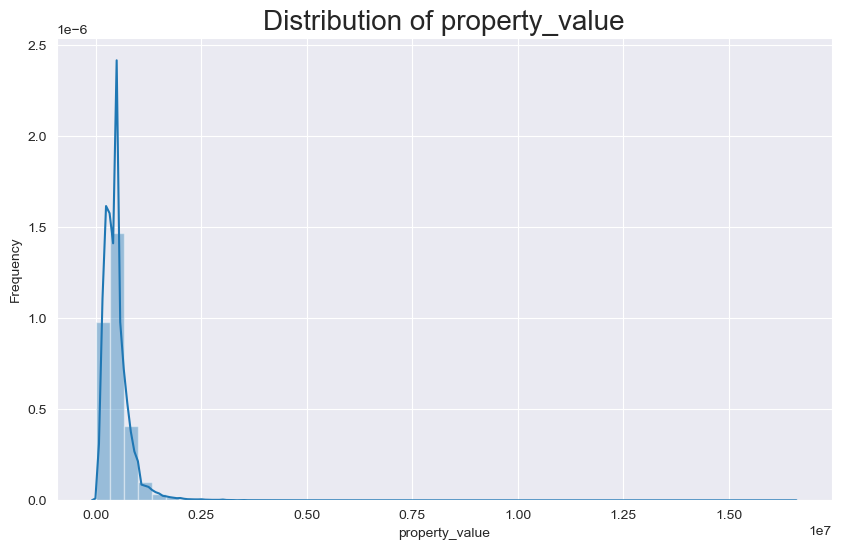

In [ ]:
plt.figure(figsize=(10,6))
g = sns.distplot(df['property_value'])
g.set_xlabel("property_value")
g.set_ylabel("Frequency")
plt.title('Distribution of property_value',size = 20)

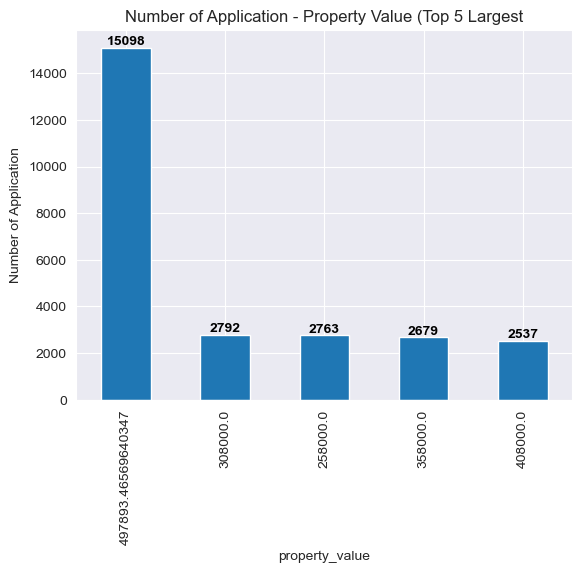

In [ ]:
top_prices = df["property_value"].value_counts().nlargest(5)
ax = top_prices.sort_values(ascending=False).plot.bar()
ax.set_ylabel("Number of Application")
ax.set_xlabel("property_value")
ax.set_title("Number of Application - Property Value (Top 5 Largest")

# Add count labels to the top of each bar
for i, v in enumerate(top_prices.sort_values(ascending=False)):
    ax.text(i, v, str(v), color='black', fontweight='bold', ha='center', va='bottom')

plt.show()

**construction_type**

Collateral construction type


In [ ]:
df['construction_type'].unique()

array(['sb', 'mh'], dtype=object)

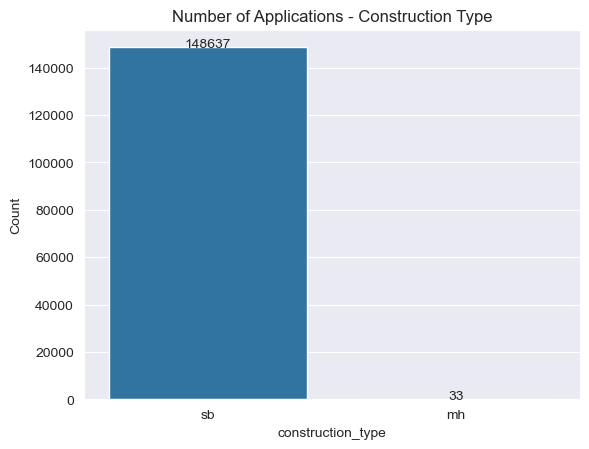

In [ ]:
# Get the counts for each category
value_counts = df["construction_type"].value_counts()

# Set the figure size and style
sns.set_style('darkgrid')

# Plot the countplot with category labels and count labels
sns.countplot(data=df, x="construction_type", order=value_counts.index)
plt.title('Number of Applications - Construction Type', fontsize=12)
plt.xlabel('construction_type')
plt.ylabel('Count')

# Add the count labels above each bar
for i, count in enumerate(value_counts):
    plt.text(i, count+5, str(count), ha='center')

plt.show()

More of 'sb' construction type than 'mh'

**occupancy_type**

Classifications refer to categorizing structures based on their usage

In [ ]:
df['occupancy_type'].unique()

array(['pr', 'sr', 'ir'], dtype=object)

pr: primary residence (refers to a property that the borrower intends to live in as their primary residence.)

sr: second residence ( refers to a property that the borrower intends to use as a vacation home or a second home, but not as their primary residence)

ir: investment residence (refers to a property that the borrower intends to rent out or use for investment purposes. )

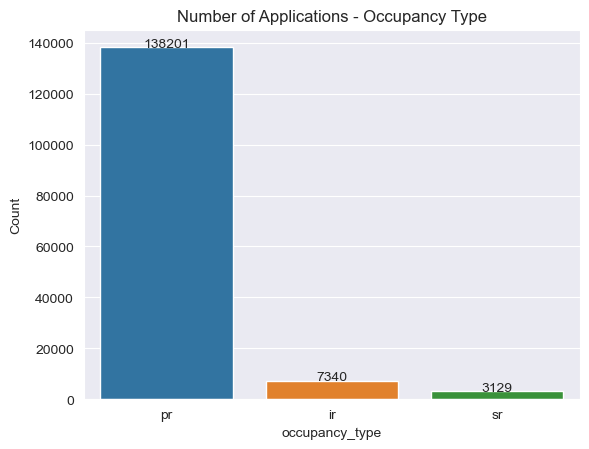

In [ ]:
# Get the counts for each category
value_counts = df['occupancy_type'].value_counts()

# Set the figure size and style
sns.set_style('darkgrid')

# Plot the countplot with category labels and count labels
sns.countplot(data=df, x='occupancy_type', order=value_counts.index)
plt.title('Number of Applications - Occupancy Type', fontsize=12)
plt.xlabel('occupancy_type')
plt.ylabel('Count')

# Add the count labels above each bar
for i, count in enumerate(value_counts):
    plt.text(i, count+5, str(count), ha='center')

plt.show()

**secured_by**

Type of collateral


In [ ]:
df['secured_by'].unique()

array(['home', 'land'], dtype=object)

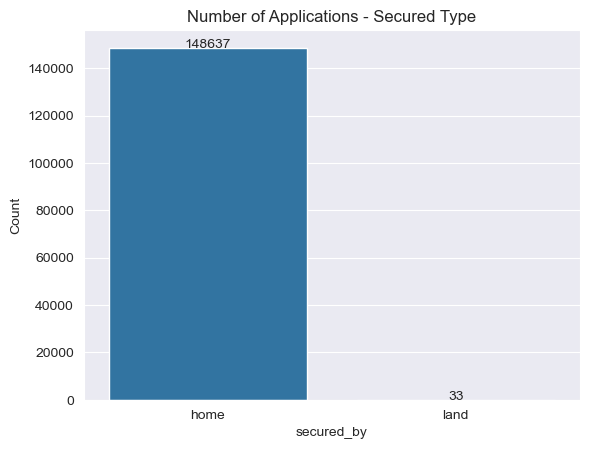

In [ ]:
# Get the counts for each category
value_counts = df['secured_by'].value_counts()

# Set the figure size and style
sns.set_style('darkgrid')

# Plot the countplot with category labels and count labels
sns.countplot(data=df, x='secured_by', order=value_counts.index)
plt.title('Number of Applications - Secured Type', fontsize=12)
plt.xlabel('secured_by')
plt.ylabel('Count')

# Add the count labels above each bar
for i, count in enumerate(value_counts):
    plt.text(i, count+5, str(count), ha='center')

plt.show()

**total_units**

Number of units


In [ ]:
df['total_units'].unique()

array(['1U', '2U', '3U', '4U'], dtype=object)

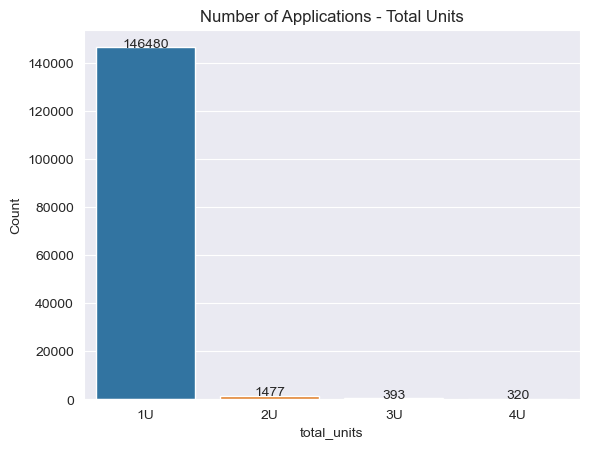

In [ ]:
# Get the counts for each category
value_counts = df['total_units'].value_counts()

# Set the figure size and style
sns.set_style('darkgrid')

# Plot the countplot with category labels and count labels
sns.countplot(data=df, x='total_units', order=value_counts.index)
plt.title('Number of Applications - Total Units', fontsize=12)
plt.xlabel('total_units')
plt.ylabel('Count')

# Add the count labels above each bar
for i, count in enumerate(value_counts):
    plt.text(i, count+5, str(count), ha='center')

plt.show()

**income**

Refers to the amount of money, property, and other transfers of value received over a set period of time


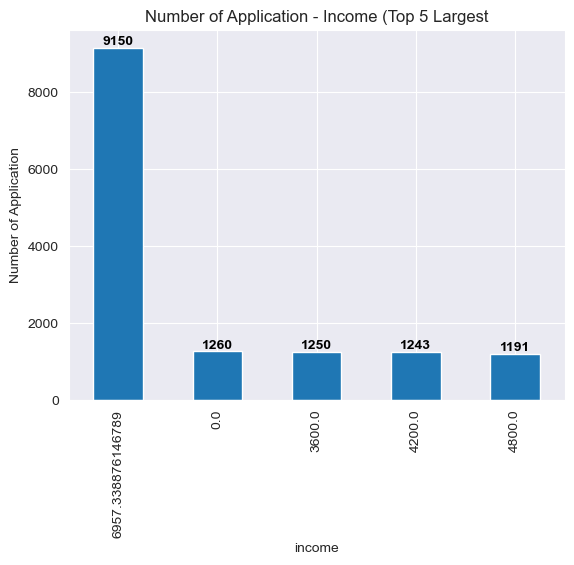

In [ ]:
top_prices = df["income"].value_counts().nlargest(5)
ax = top_prices.sort_values(ascending=False).plot.bar()
ax.set_ylabel("Number of Application")
ax.set_xlabel("income")
ax.set_title("Number of Application - Income (Top 5 Largest")

# Add count labels to the top of each bar
for i, v in enumerate(top_prices.sort_values(ascending=False)):
    ax.text(i, v, str(v), color='black', fontweight='bold', ha='center', va='bottom')

plt.show()

Among those who applied, most of them got an income of 6957.33. 
There are 1260 of them who doesnt have an income

In [ ]:
df['income'].describe()

count    148670.000000
mean       6957.338876
std        6293.492004
min           0.000000
25%        3840.000000
50%        6000.000000
75%        8280.000000
max      578580.000000
Name: income, dtype: float64

**credit_type**

Type of credit


In [ ]:
df['credit_type'].unique()

array(['EXP', 'EQUI', 'CRIF', 'CIB'], dtype=object)

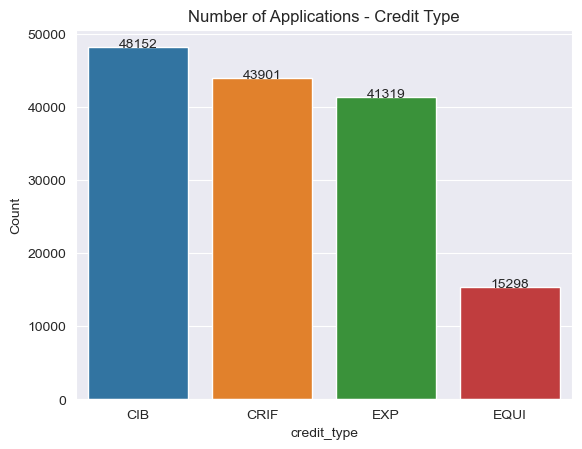

In [ ]:
# Get the counts for each category
value_counts = df['credit_type'].value_counts()

# Set the figure size and style
sns.set_style('darkgrid')

# Plot the countplot with category labels and count labels
sns.countplot(data=df, x='credit_type', order=value_counts.index)
plt.title('Number of Applications - Credit Type', fontsize=12)
plt.xlabel('credit_type')
plt.ylabel('Count')

# Add the count labels above each bar
for i, count in enumerate(value_counts):
    plt.text(i, count+5, str(count), ha='center')

plt.show()

**credit_score**

C:\Users\User\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Distribution of credit_score')

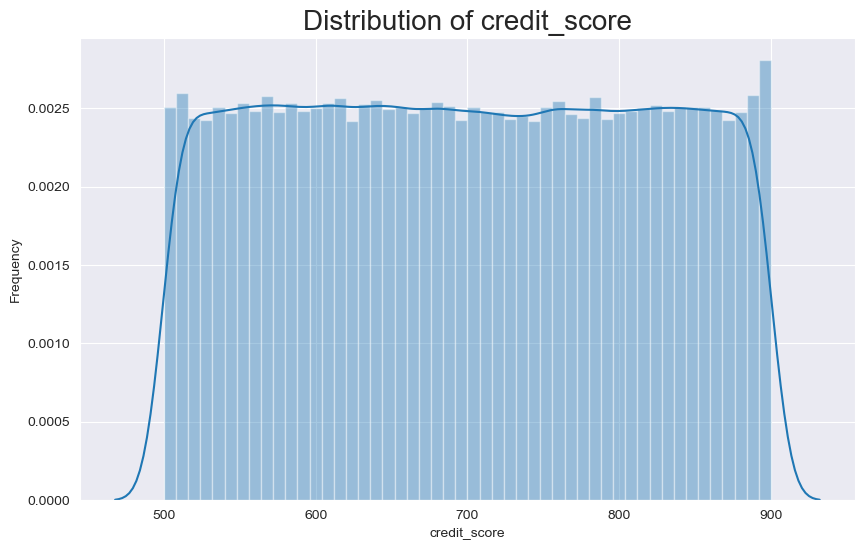

In [ ]:
plt.figure(figsize=(10,6))
g = sns.distplot(df['credit_score'])
g.set_xlabel("credit_score")
g.set_ylabel("Frequency")
plt.title('Distribution of credit_score',size = 20)

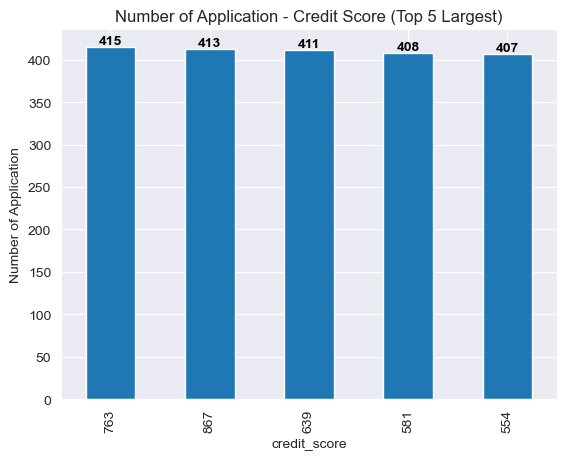

In [ ]:
top_prices = df["credit_score"].value_counts().nlargest(5)
ax = top_prices.sort_values(ascending=False).plot.bar()
ax.set_ylabel("Number of Application")
ax.set_xlabel("credit_score")
ax.set_title("Number of Application - Credit Score (Top 5 Largest)")

# Add count labels to the top of each bar
for i, v in enumerate(top_prices.sort_values(ascending=False)):
    ax.text(i, v, str(v), color='black', fontweight='bold', ha='center', va='bottom')

plt.show()

In [ ]:
df['credit_score'].describe()

count    148670.000000
mean        699.789103
std         115.875857
min         500.000000
25%         599.000000
50%         699.000000
75%         800.000000
max         900.000000
Name: credit_score, dtype: float64

**co-applicant_credit_type**

Is an additional person involved in the loan application process


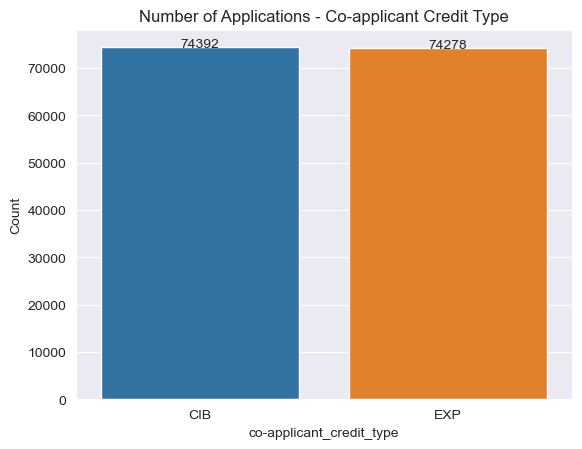

In [ ]:
# Get the counts for each category
value_counts = df['co-applicant_credit_type'].value_counts()

# Set the figure size and style
sns.set_style('darkgrid')

# Plot the countplot with category labels and count labels
sns.countplot(data=df, x='co-applicant_credit_type', order=value_counts.index)
plt.title('Number of Applications - Co-applicant Credit Type', fontsize=12)
plt.xlabel('co-applicant_credit_type')
plt.ylabel('Count')

# Add the count labels above each bar
for i, count in enumerate(value_counts):
    plt.text(i, count+5, str(count), ha='center')

plt.show()

**age**

Applicant’s age


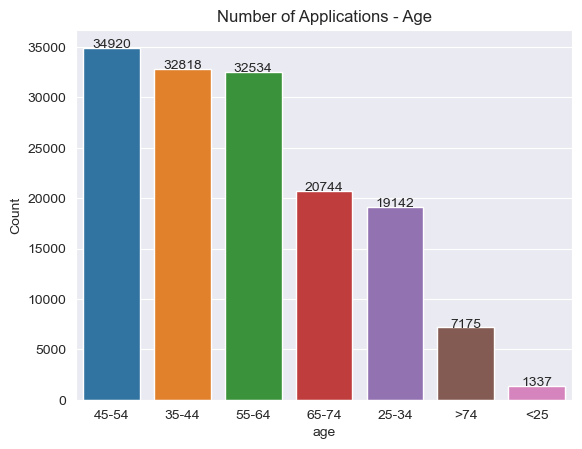

In [ ]:
# Get the counts for each category
value_counts = df['age'].value_counts()

# Set the figure size and style
sns.set_style('darkgrid')

# Plot the countplot with category labels and count labels
sns.countplot(data=df, x='age', order=value_counts.index)
plt.title('Number of Applications - Age', fontsize=12)
plt.xlabel('age')
plt.ylabel('Count')

# Add the count labels above each bar
for i, count in enumerate(value_counts):
    plt.text(i, count+5, str(count), ha='center')

plt.show()

**submission_of_application**

Ensure the application is complete or not


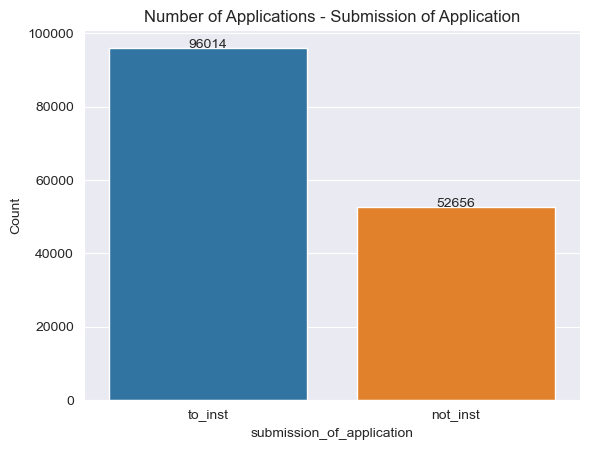

In [ ]:
# Get the counts for each category
value_counts = df['submission_of_application'].value_counts()

# Set the figure size and style
sns.set_style('darkgrid')

# Plot the countplot with category labels and count labels
sns.countplot(data=df, x='submission_of_application', order=value_counts.index)
plt.title('Number of Applications - Submission of Application', fontsize=12)
plt.xlabel('submission_of_application')
plt.ylabel('Count')

# Add the count labels above each bar
for i, count in enumerate(value_counts):
    plt.text(i, count+5, str(count), ha='center')

plt.show()

**ltv**

Life-time value (LTV) is the prognostication of the net profit


C:\Users\User\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Distribution of ltv')

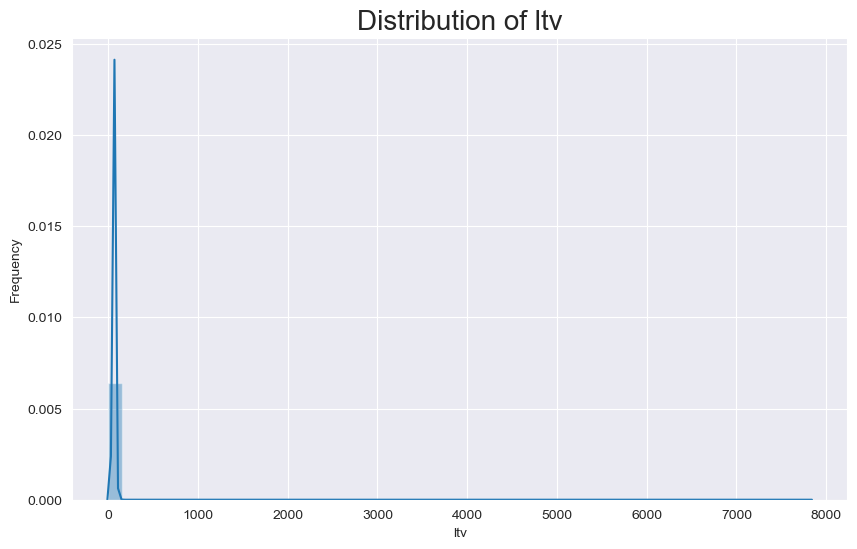

In [ ]:
plt.figure(figsize=(10,6))
g = sns.distplot(df['ltv'])
g.set_xlabel("ltv")
g.set_ylabel("Frequency")
plt.title('Distribution of ltv',size = 20)

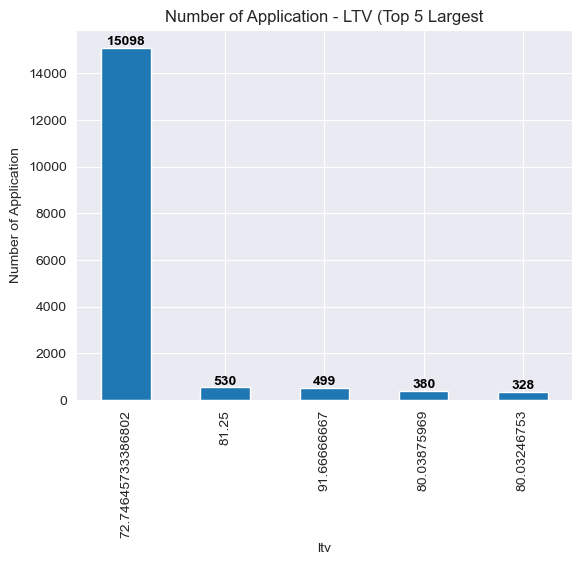

In [ ]:
top_prices = df["ltv"].value_counts().nlargest(5)
ax = top_prices.sort_values(ascending=False).plot.bar()
ax.set_ylabel("Number of Application")
ax.set_xlabel("ltv")
ax.set_title("Number of Application - LTV (Top 5 Largest")

# Add count labels to the top of each bar
for i, v in enumerate(top_prices.sort_values(ascending=False)):
    ax.text(i, v, str(v), color='black', fontweight='bold', ha='center', va='bottom')

plt.show()

In [ ]:
df['ltv'].describe()

count    148670.000000
mean         72.746457
std          37.883839
min           0.967478
25%          63.297872
50%          73.026316
75%          84.722222
max        7831.250000
Name: ltv, dtype: float64

**region**

Applicant’s place


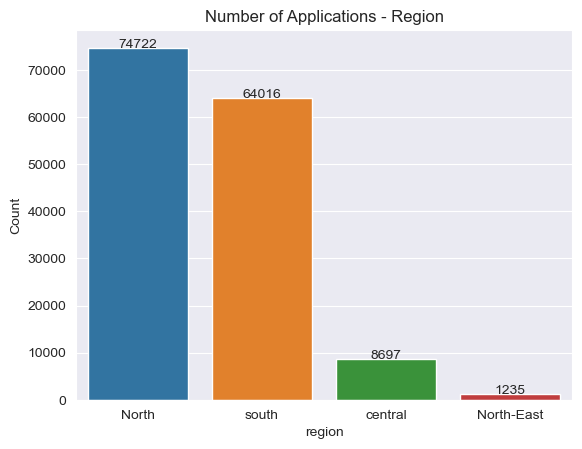

In [ ]:
# Get the counts for each category
value_counts = df['region'].value_counts()

# Set the figure size and style
sns.set_style('darkgrid')

# Plot the countplot with category labels and count labels
sns.countplot(data=df, x='region', order=value_counts.index)
plt.title('Number of Applications - Region', fontsize=12)
plt.xlabel('region')
plt.ylabel('Count')

# Add the count labels above each bar
for i, count in enumerate(value_counts):
    plt.text(i, count+5, str(count), ha='center')

plt.show()

**security_type**

Type of collateral


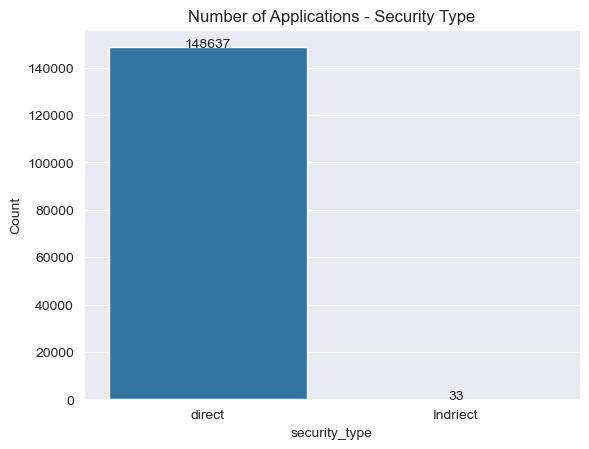

In [ ]:
# Get the counts for each category
value_counts = df['security_type'].value_counts()

# Set the figure size and style
sns.set_style('darkgrid')

# Plot the countplot with category labels and count labels
sns.countplot(data=df, x='security_type', order=value_counts.index)
plt.title('Number of Applications - Security Type', fontsize=12)
plt.xlabel('security_type')
plt.ylabel('Count')

# Add the count labels above each bar
for i, count in enumerate(value_counts):
    plt.text(i, count+5, str(count), ha='center')

plt.show()

**status**

Loan status (Approved/Declined)


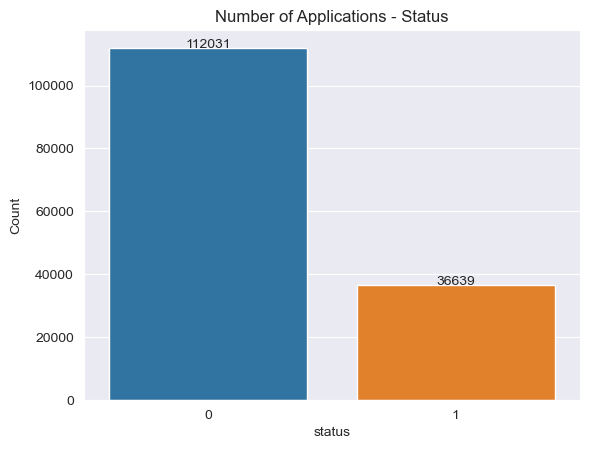

In [ ]:
# Get the counts for each category
value_counts = df['status'].value_counts()

# Set the figure size and style
sns.set_style('darkgrid')

# Plot the countplot with category labels and count labels
sns.countplot(data=df, x='status', order=value_counts.index)
plt.title('Number of Applications - Status', fontsize=12)
plt.xlabel('status')
plt.ylabel('Count')

# Add the count labels above each bar
for i, count in enumerate(value_counts):
    plt.text(i, count+5, str(count), ha='center')

plt.show()

**dtir1**

Debt-to-income ratio


C:\Users\User\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Distribution of dtir1')

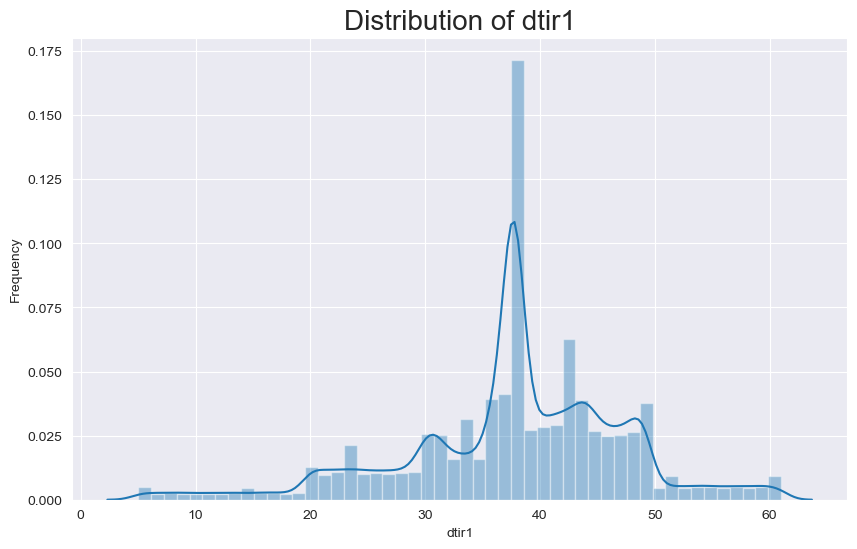

In [ ]:
plt.figure(figsize=(10,6))
g = sns.distplot(df['dtir1'])
g.set_xlabel("dtir1")
g.set_ylabel("Frequency")
plt.title('Distribution of dtir1',size = 20)

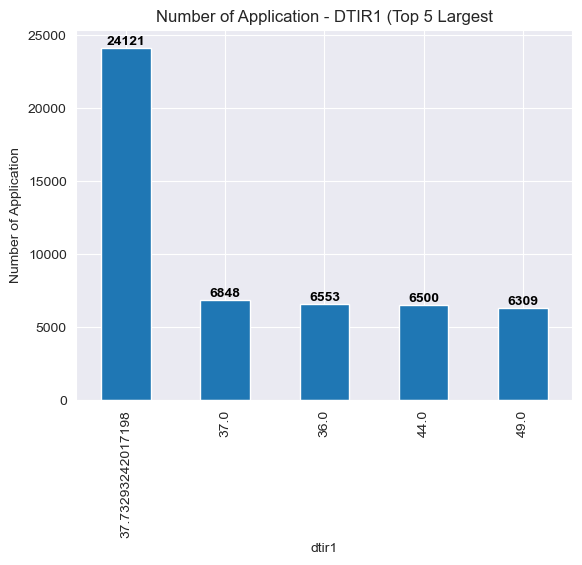

In [ ]:
top_prices = df["dtir1"].value_counts().nlargest(5)
ax = top_prices.sort_values(ascending=False).plot.bar()
ax.set_ylabel("Number of Application")
ax.set_xlabel("dtir1")
ax.set_title("Number of Application - DTIR1 (Top 5 Largest")

# Add count labels to the top of each bar
for i, v in enumerate(top_prices.sort_values(ascending=False)):
    ax.text(i, v, str(v), color='black', fontweight='bold', ha='center', va='bottom')

plt.show()

In [ ]:
df["dtir1"].describe()

count    148670.000000
mean         37.732932
std           9.652119
min           5.000000
25%          33.000000
50%          37.732932
75%          44.000000
max          61.000000
Name: dtir1, dtype: float64

## Relationships

In [ ]:
# Getting dataframes by datatype
dtypes = pd.DataFrame(df.dtypes).reset_index()

cat_vars = []
num_vars = []
for i, l in zip(dtypes['index'], dtypes[0]):
    if l == 'object':
        cat_vars.append(i)
    else:
        num_vars.append(i)

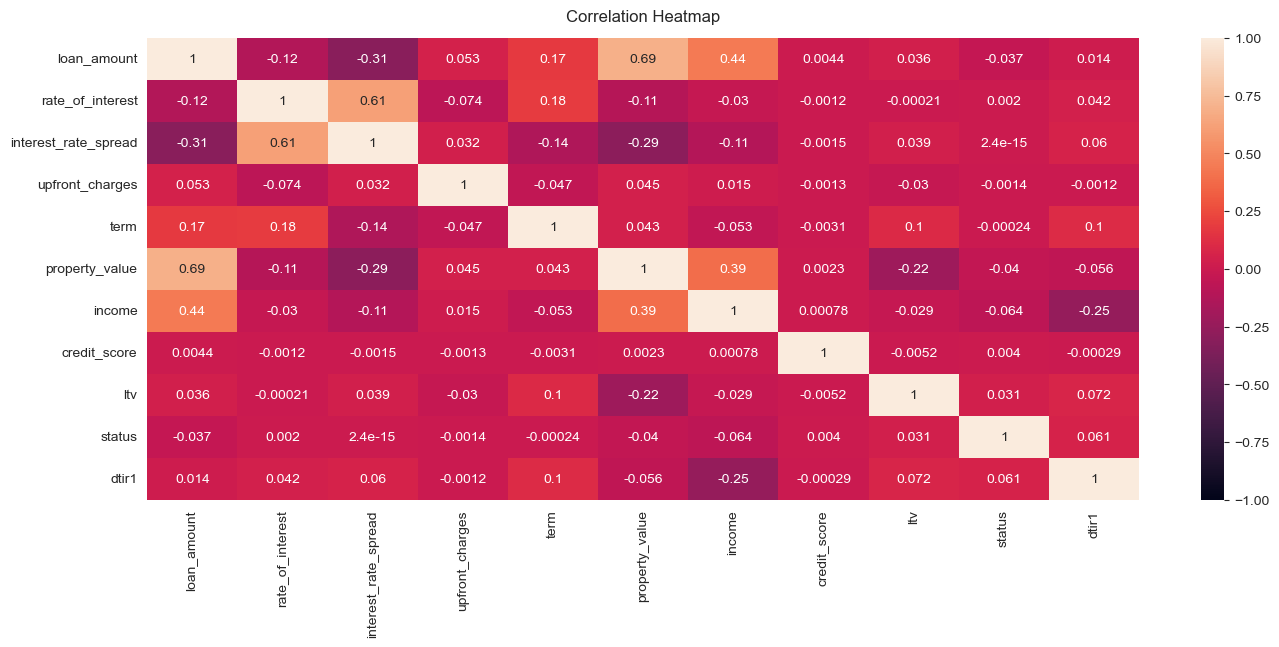

In [ ]:
corr = df[num_vars].corr()

# Correlation Heatmap
plt.figure(figsize=(16, 6))
heatmap = sns.heatmap(corr, vmin=-1, vmax=1, annot=True)
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12);

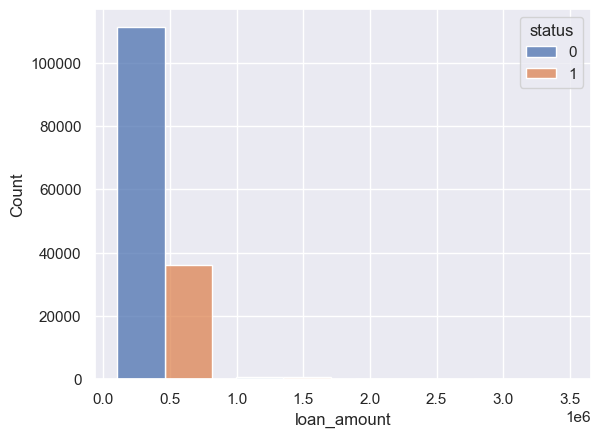

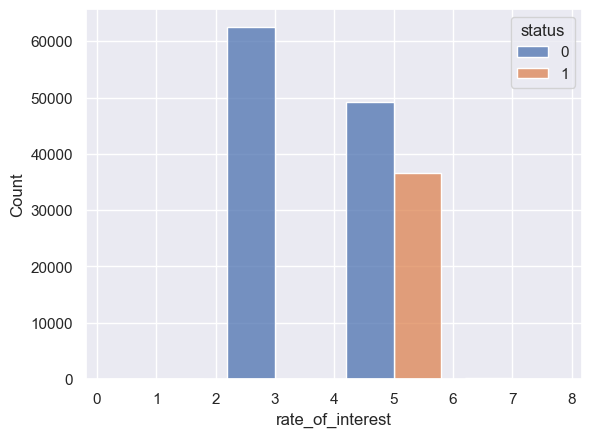

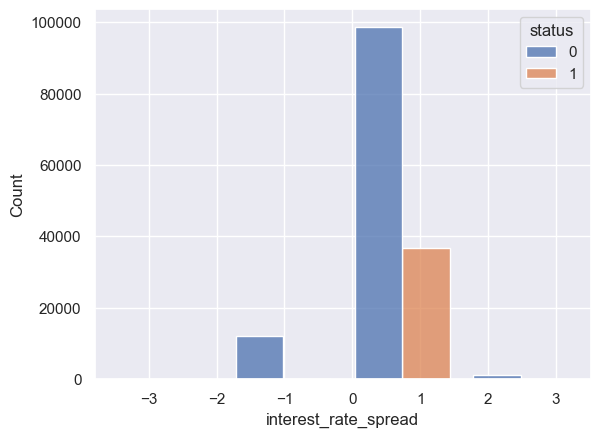

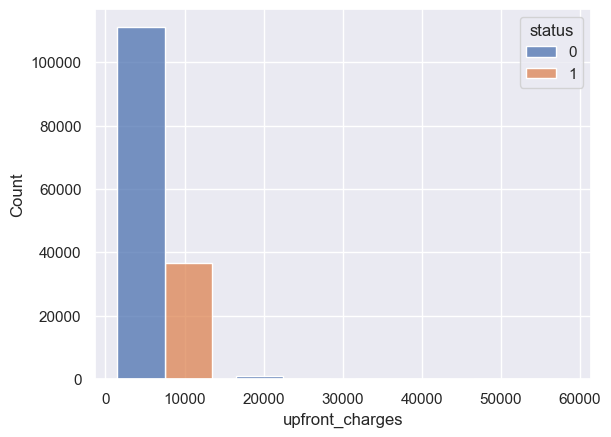

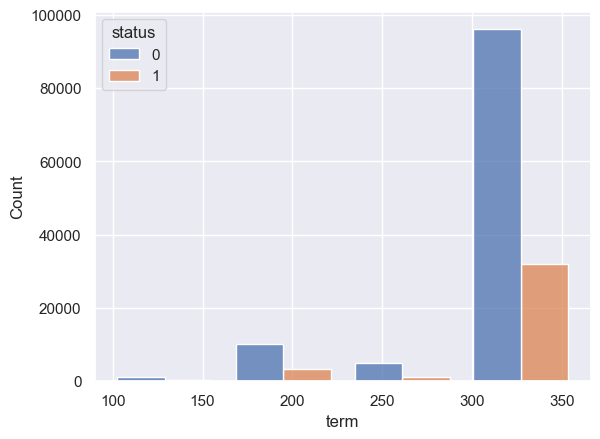

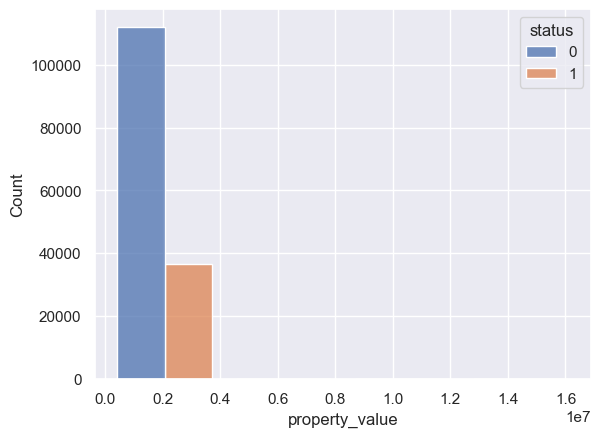

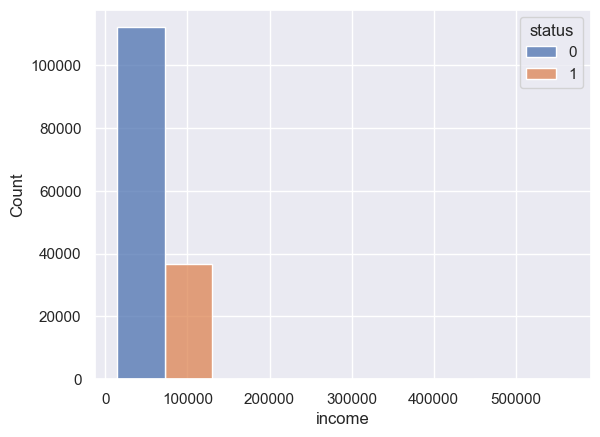

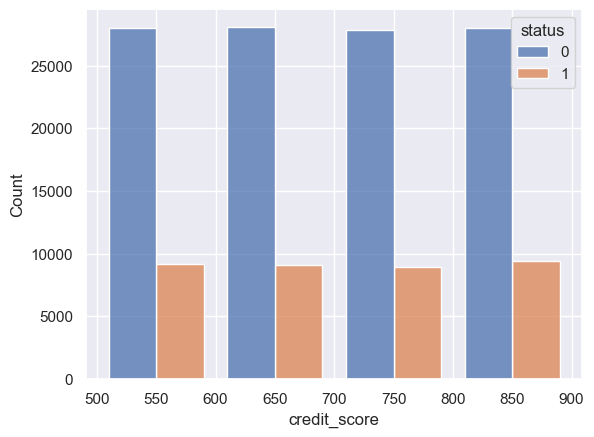

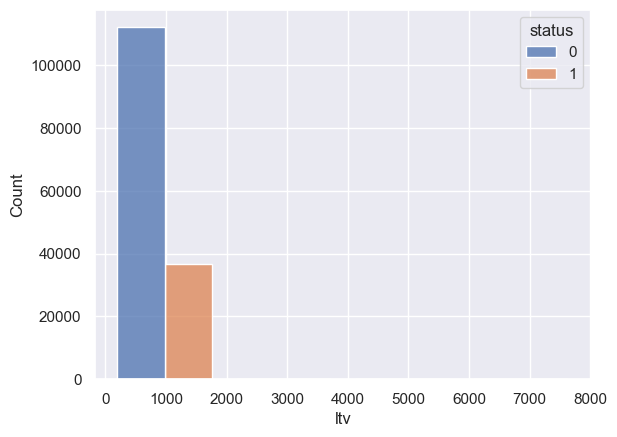

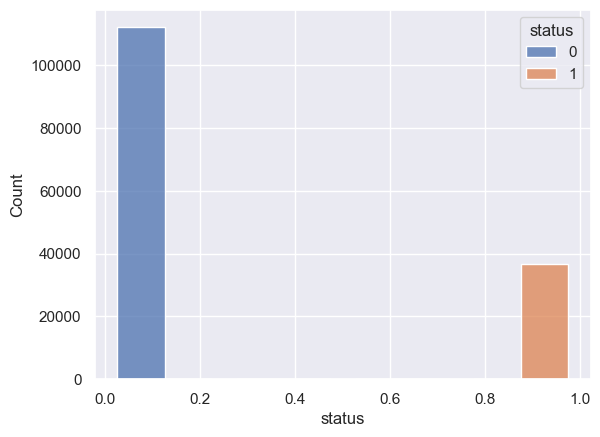

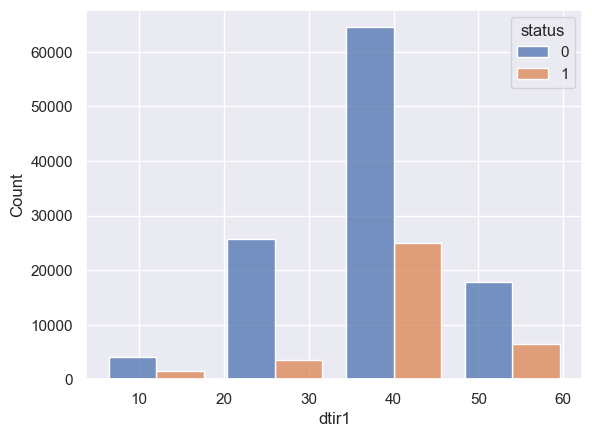

In [ ]:
# Histograms for num variables
for i in num_vars:
    plt.figsize=(10,5)
    sns.set_theme(style='darkgrid')
    sns.histplot(data=df, x=i, hue="status", multiple="dodge", shrink=.8, bins=4)
    plt.show()

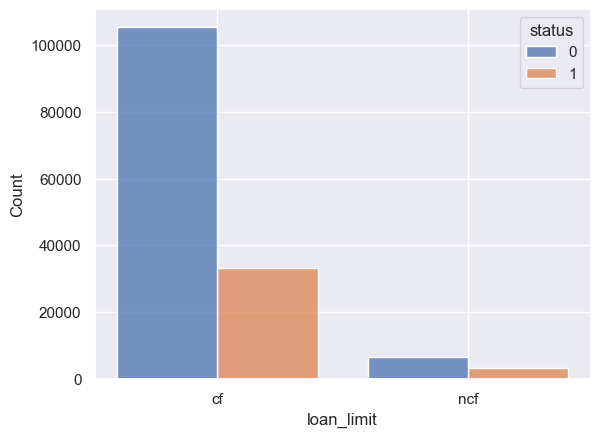

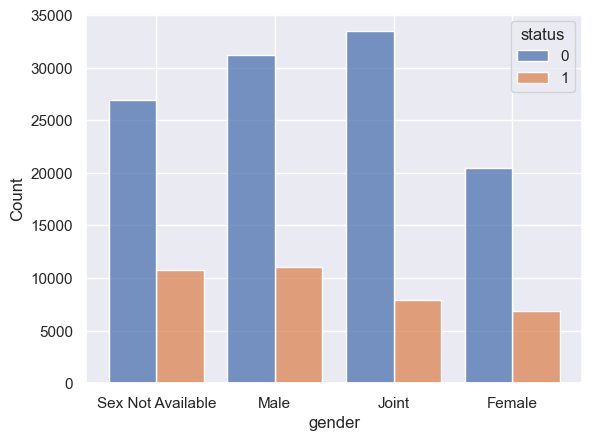

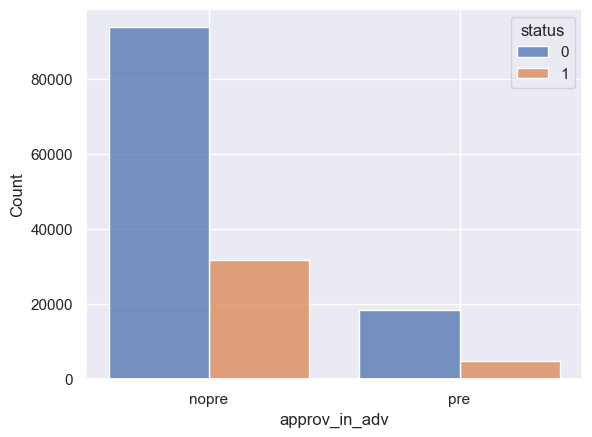

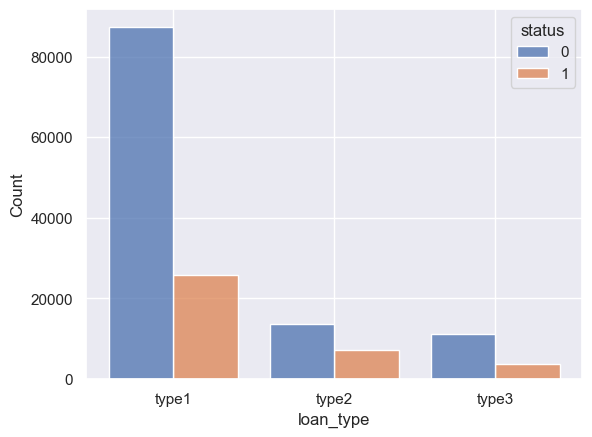

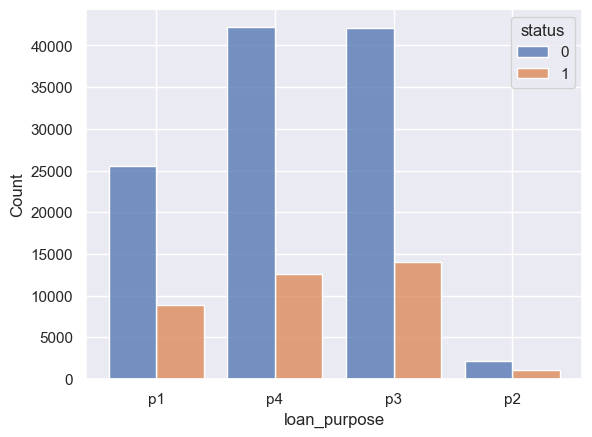

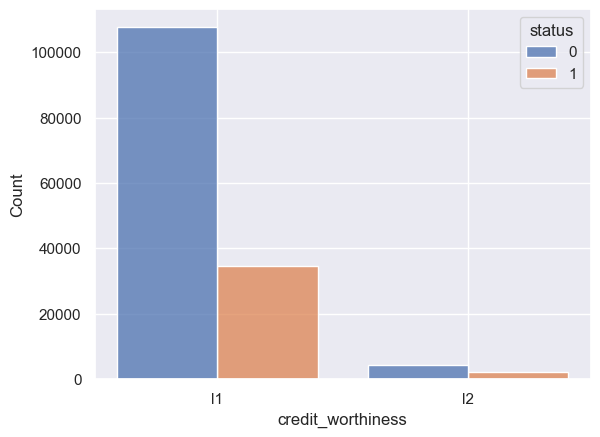

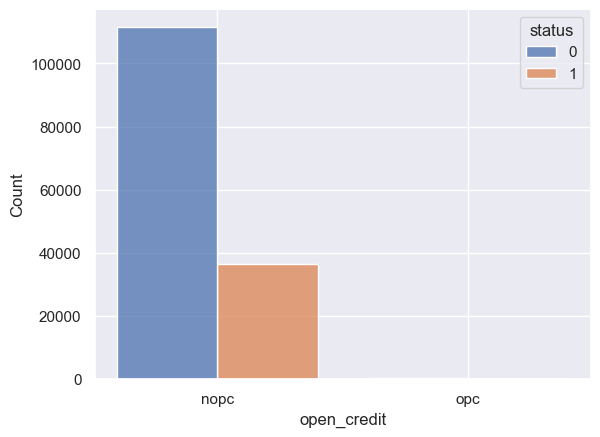

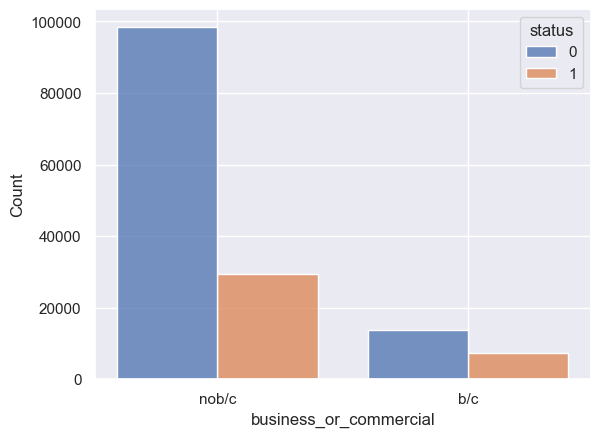

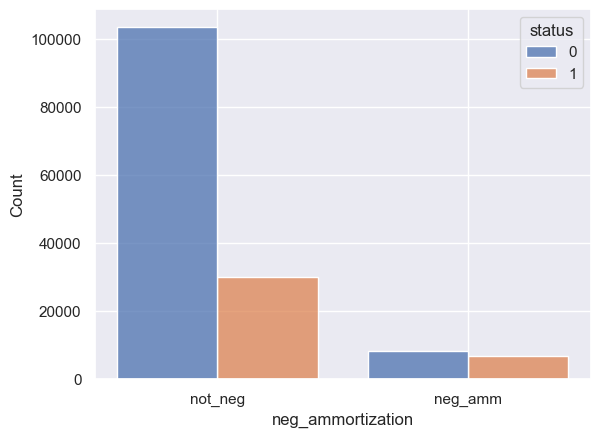

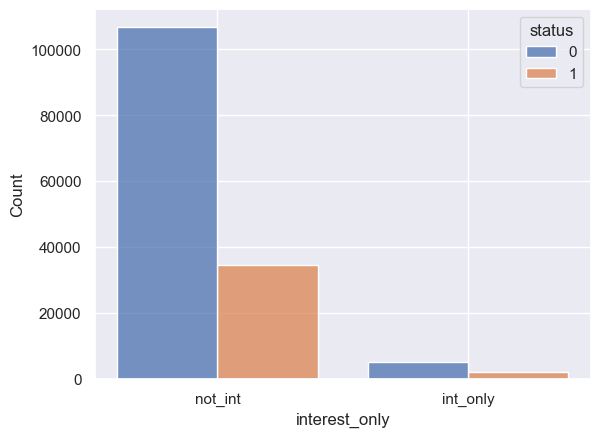

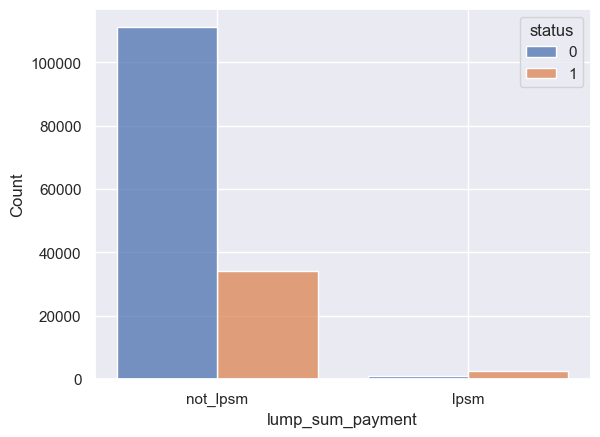

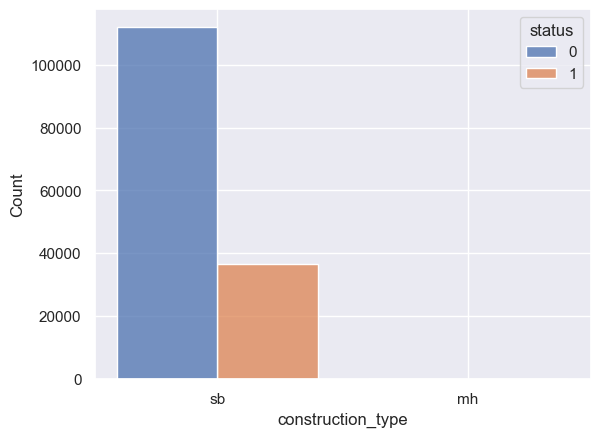

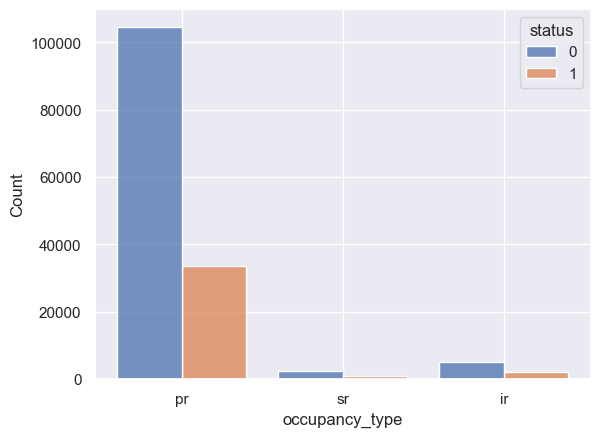

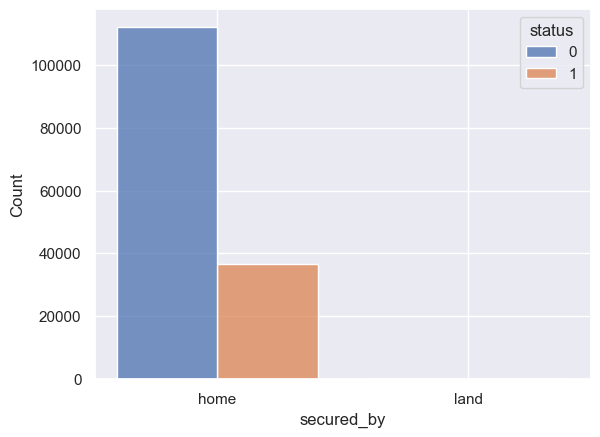

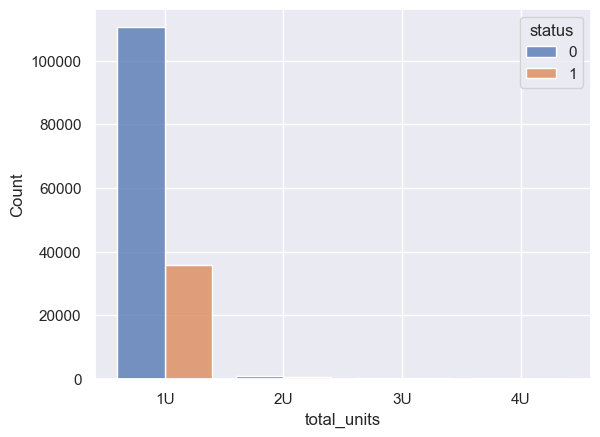

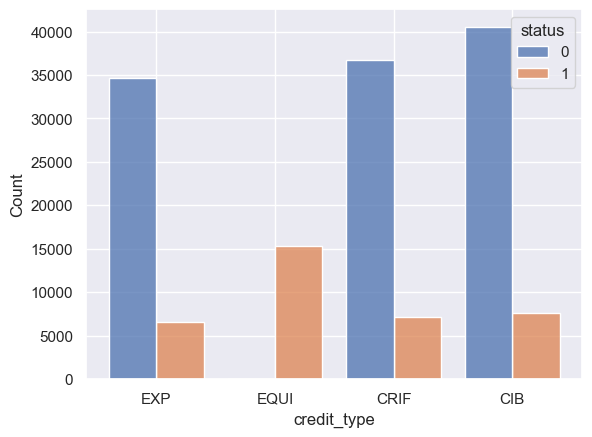

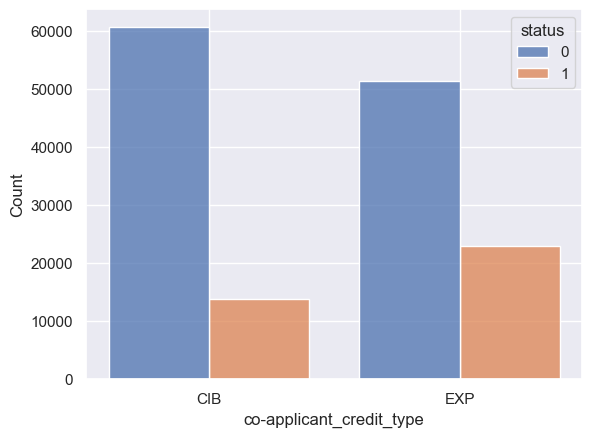

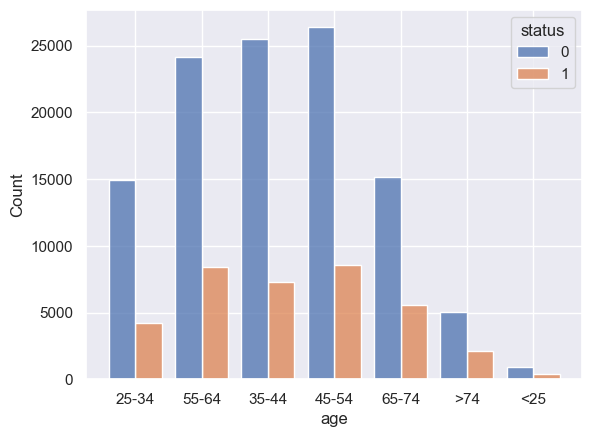

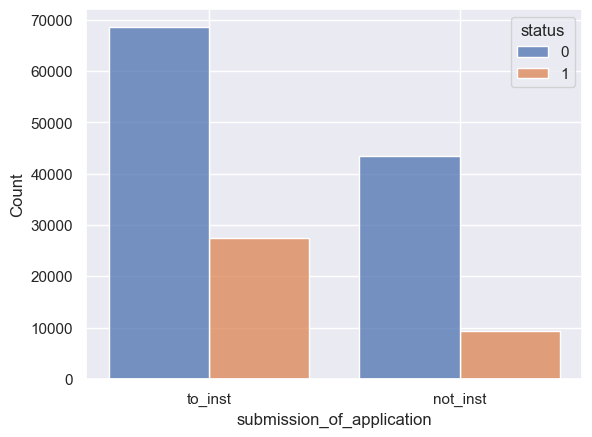

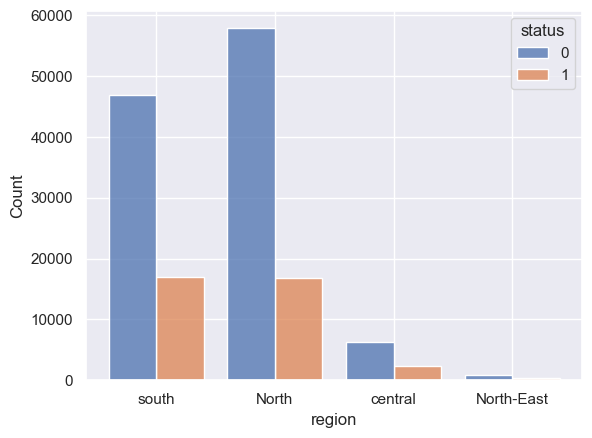

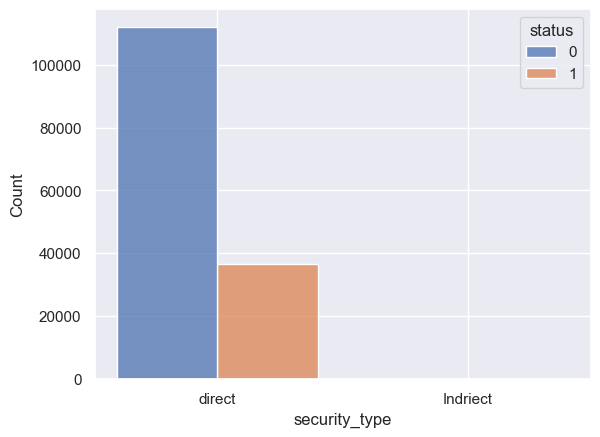

1    33
Name: status, dtype: int64

In [ ]:
# hist for categorical
def plot_hist(col):
    plt.figsize=(10,6)
    sns.set_theme(style='darkgrid')
    sns.histplot(data=df, x=col, hue="status", multiple="dodge", shrink=.8, stat='count')
    plt.show()


# loan_limit
plot_hist(df['loan_limit'])

# Gender
plot_hist(df['gender'])

# approved in advance
plot_hist(df['approv_in_adv'])

# loan_type
plot_hist(df['loan_type'])

# loan_purpose
plot_hist(df['loan_purpose'])

# Credit worthiness
plot_hist(df['credit_worthiness'])

# Open credit
plot_hist(df['open_credit'])

# Business or commercial
plot_hist(df['business_or_commercial'])

# neg_ammortization
plot_hist(df['neg_ammortization'])

# interest_only
plot_hist(df['interest_only'])

# Lump sum payment
plot_hist(df['lump_sum_payment'])
df['lump_sum_payment'].value_counts()
lpsm = df[df['lump_sum_payment'] == 'lpsm']
lpsm['status'].value_counts() 

# Construction type
plot_hist(df['construction_type'])
df['construction_type'].value_counts() 
mh = df[df['construction_type'] == 'mh']
mh['status'].value_counts() 

# occupancy_type
plot_hist(df['occupancy_type'])

# secured_by
plot_hist(df['secured_by'])
df['secured_by'].value_counts()
land = df[df['secured_by'] == 'land']
land['status'].value_counts()

# total_units
plot_hist(df['total_units'])
df['total_units'].value_counts()

# credit_type
plot_hist(df['credit_type'])

# co-applicant_credit_type
plot_hist(df['co-applicant_credit_type'])

# age
plot_hist(df['age'])

# submission_of_application
plot_hist(df['submission_of_application'])

# region
plot_hist(df['region'])

# security_type
plot_hist(df['security_type'])
df['security_type'].value_counts()
indirect = df[df['security_type'] == 'Indriect']
indirect['status'].value_counts()

## Feature Selection

In [ ]:
# from sklearn.preprocessing import MinMaxScaler

In [ ]:
# from sklearn.feature_selection import SelectKBest, f_classif

from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
# from sklearn.preprocessing import MinMaxScaler
# from sklearn.feature_selection import RFE
# from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score


In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectKBest, f_classif

X = df.drop('status', axis=1)
y = df['status']

# encode categorical variables
categorical_cols = X.select_dtypes(include='object').columns
for col in categorical_cols:
    X[col] = pd.factorize(X[col])[0]

# split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# scale the data using StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# define the model
model = RandomForestClassifier(random_state=42)

# use cross-validation to estimate the accuracy score
best_score = 0
for k in range(1, X_train.shape[1] + 1):
    selector = SelectKBest(f_classif, k=k)
    X_train_new = selector.fit_transform(X_train_scaled, y_train)
    scores = cross_val_score(model, X_train_new, y_train, cv=5)
    score = scores.mean()
    if score > best_score:
        best_score = score
        best_features = X.columns[selector.get_support()].tolist()
#     print(f"Number of features: {k}, Accuracy score: {score}")

print(f"Best features: {best_features}")

# fit the model on the best subset of features and report the test accuracy score
selector = SelectKBest(f_classif, k=len(best_features))
X_train_new = selector.fit_transform(X_train_scaled, y_train)
X_test_new = selector.transform(X_test_scaled)
model.fit(X_train_new, y_train)
y_pred = model.predict(X_test_new)
score = accuracy_score(y_test, y_pred)
print(f"Test accuracy score: {score}")


Best features: ['loan_limit', 'gender', 'approv_in_adv', 'loan_type', 'loan_purpose', 'credit_worthiness', 'open_credit', 'business_or_commercial', 'loan_amount', 'rate_of_interest', 'interest_rate_spread', 'upfront_charges', 'term', 'neg_ammortization', 'interest_only', 'lump_sum_payment', 'property_value', 'construction_type', 'occupancy_type', 'secured_by', 'total_units', 'income', 'credit_type', 'credit_score', 'co-applicant_credit_type', 'age', 'submission_of_application', 'ltv', 'region', 'security_type', 'dtir1']
Test accuracy score: 0.9999663684670748


## Drop unnecessary cols

In [ ]:
best_features.append('status')

# Find the common columns between the DataFrame and the list
common_cols = list(set(df.columns).intersection(set(best_features)))

# Drop the columns that are not in the common columns list
df = df.drop([col for col in df.columns if col not in common_cols], axis=1)
df

,loan_limit,gender,approv_in_adv,loan_type,loan_purpose,credit_worthiness,open_credit,business_or_commercial,loan_amount,rate_of_interest,...,credit_type,credit_score,co-applicant_credit_type,age,submission_of_application,ltv,region,security_type,status,dtir1
0,cf,Sex Not Available,nopre,type1,p1,l1,nopc,nob/c,116500,4.045476,...,EXP,758,CIB,25-34,to_inst,98.728814,south,direct,1,45.000000
1,cf,Male,nopre,type2,p1,l1,nopc,b/c,206500,4.045476,...,EQUI,552,EXP,55-64,to_inst,72.746457,North,direct,1,37.732932
2,cf,Male,pre,type1,p1,l1,nopc,nob/c,406500,4.560000,...,EXP,834,CIB,35-44,to_inst,80.019685,south,direct,0,46.000000
3,cf,Male,nopre,type1,p4,l1,nopc,nob/c,456500,4.250000,...,EXP,587,CIB,45-54,not_inst,69.376900,North,direct,0,42.000000
4,cf,Joint,pre,type1,p1,l1,nopc,nob/c,696500,4.000000,...,CRIF,602,EXP,25-34,not_inst,91.886544,North,direct,0,39.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
148665,cf,Sex Not Available,nopre,type1,p3,l1,nopc,nob/c,436500,3.125000,...,CIB,659,EXP,55-64,to_inst,71.792763,south,direct,0,48.000000
148666,cf,Male,nopre,type1,p1,l1,nopc,nob/c,586500,5.190000,...,CIB,569,CIB,25-34,not_inst,74.428934,south,direct,0,15.000000
148667,cf,Male,nopre,type1,p4,l1,nopc,nob/c,446500,3.125000,...,CIB,702,EXP,45-54,not_inst,61.332418,North,direct,0,49.000000
148668,cf,Female,nopre,type1,p4,l1,nopc,nob/c,196500,3.500000,...,EXP,737,EXP,55-64,to_inst,70.683453,North,direct,0,29.000000


## Categorical Encoding

### Categorical Attributes

In [ ]:
dtypes = pd.DataFrame(df.dtypes).reset_index()
cat_vars = []
num_vars = []
for i, l in zip(dtypes['index'], dtypes[0]):
    if l == 'object':
        cat_vars.append(i)
    else:
        num_vars.append(i)

In [ ]:
num_vars

['loan_amount',
 'rate_of_interest',
 'interest_rate_spread',
 'upfront_charges',
 'term',
 'property_value',
 'income',
 'credit_score',
 'ltv',
 'status',
 'dtir1']

In [ ]:
# Binary Variables
binary_vars = ['security_type', 'submission_of_application', 'co-applicant_credit_type', 'secured_by', 'lump_sum_payment', 'interest_only', 'neg_ammortization', 'construction_type', 'business_or_commercial', 'open_credit', 'credit_worthiness', 'approv_in_adv', 'loan_limit']


# binary_vars = ['neg_ammortization', 'business_or_commercial', 'loan_limit']


Reason for creating a list of binary variables:
To reduce the size of our df after encoding. We can later use a Label Encoder for the binary variables which will result in one column of 1's and 0's. If we were to use sklearn's OneHotEncoder on binary variables, it would create two columns, one for each possible value, which is redundant considering we can use one column where the value "1" represents one possible value and "0" represents the other.

In [ ]:
# Label Encoder
label = LabelEncoder()
for i in binary_vars:
    df[i] = label.fit_transform(df[i])


# OneHotEncoding
df_cat = df[cat_vars]
df_cat.drop(columns=binary_vars, inplace=True)

cat_encoder = OneHotEncoder()
df_cat_1hot = cat_encoder.fit_transform(df_cat)
df_cat_encoded = pd.DataFrame(df_cat_1hot.toarray())


# Column names
cat_encoder.categories_
cat_columns = [
    'Female', 'Joint', 'Male', 'Sex Not Available',
               'type1', 'type2', 'type3',
               'p1', 'p2', 'p3', 'p4',
               'ir', 'pr', 'sr',
               'U1', 'U2', 'U3', 'U4',
               'CIB', 'CRIF', 'EQUI', 'EXP',
               'age_25-34', 'age_35-44', 'age_45-54', 'age_55-64', 'age_65-74', 'under_25', 'over_74',
               'North', 'North-East', 'central', 'south'
              ]

df_cat_encoded.columns = cat_columns
df.drop(columns=df_cat.columns, inplace=True)
# # Concat
df = pd.concat([df, df_cat_encoded], axis=1, join='inner')

C:\Users\User\AppData\Local\Temp\ipykernel_13968\739050147.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cat.drop(columns=binary_vars, inplace=True)


In [ ]:
df.columns

Index(['loan_limit', 'approv_in_adv', 'credit_worthiness', 'open_credit',
       'business_or_commercial', 'loan_amount', 'rate_of_interest',
       'interest_rate_spread', 'upfront_charges', 'term', 'neg_ammortization',
       'interest_only', 'lump_sum_payment', 'property_value',
       'construction_type', 'secured_by', 'income', 'credit_score',
       'co-applicant_credit_type', 'submission_of_application', 'ltv',
       'security_type', 'status', 'dtir1', 'Female', 'Joint', 'Male',
       'Sex Not Available', 'type1', 'type2', 'type3', 'p1', 'p2', 'p3', 'p4',
       'ir', 'pr', 'sr', 'U1', 'U2', 'U3', 'U4', 'CIB', 'CRIF', 'EQUI', 'EXP',
       'age_25-34', 'age_35-44', 'age_45-54', 'age_55-64', 'age_65-74',
       'under_25', 'over_74', 'North', 'North-East', 'central', 'south'],
      dtype='object')

In [ ]:
df

,loan_limit,approv_in_adv,credit_worthiness,open_credit,business_or_commercial,loan_amount,rate_of_interest,interest_rate_spread,upfront_charges,term,...,age_35-44,age_45-54,age_55-64,age_65-74,under_25,over_74,North,North-East,central,south
0,0,0,0,0,1,116500,4.045476,0.441656,3224.996127,360.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0,0,0,0,0,206500,4.045476,0.441656,3224.996127,360.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,0,1,0,0,1,406500,4.560000,0.200000,595.000000,360.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0,0,0,0,1,456500,4.250000,0.681000,3224.996127,360.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,0,1,0,0,1,696500,4.000000,0.304200,0.000000,360.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
148665,0,0,0,0,1,436500,3.125000,0.257100,9960.000000,180.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
148666,0,0,0,0,1,586500,5.190000,0.854400,0.000000,360.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
148667,0,0,0,0,1,446500,3.125000,0.081600,1226.640000,180.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
148668,0,0,0,0,1,196500,3.500000,0.582400,4323.330000,180.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [ ]:
df.to_csv("./Datasets/loan_default_latest_ver.csv", index=False)